In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans
from sklearn.metrics import silhouette_score
from tqdm.autonotebook import tqdm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [ ]:
path = "/content/drive/MyDrive/SEC Satria Data/Data SEC.xlsx"

In [ ]:
df = pd.read_excel(path)

In [ ]:
df

Provinsi     IHK  Inflasi      Ekspor      Impor    Periode
0                  Aceh  103.53     0.66   29.660000   1.510000 2020-01-01
1                  Aceh  103.99     1.11   25.990000   1.049000 2020-02-01
2                  Aceh  100.57     1.71   38.975534   1.941383 2020-03-01
3                  Aceh  102.13     1.56   20.518262   0.358644 2020-04-01
4                  Aceh  103.95     1.82   15.359581   0.245993 2020-05-01
...                 ...     ...      ...         ...        ...        ...
1083  Kalimantan Tengah  111.36     0.97  622.100000   2.480000 2022-04-01
1084  Kalimantan Tengah  112.40     0.93  578.300000   0.530000 2022-05-01
1085  Kalimantan Tengah  113.39     0.88  405.700000   5.470000 2022-06-01
1086  Kalimantan Tengah  113.89     0.44  507.850000   5.920000 2022-07-01
1087  Kalimantan Tengah  113.88    -0.01  505.660000  11.680000 2022-08-01

[1088 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Provinsi  1088 non-null   object        
 1   IHK       1088 non-null   float64       
 2   Inflasi   1088 non-null   float64       
 3   Ekspor    1088 non-null   float64       
 4   Impor     1088 non-null   float64       
 5   Periode   1088 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 51.1+ KB


In [ ]:
df.Provinsi.unique()

array(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DIY Yogyakarta',
       'DKI Jakarta', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
       'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Maluku',
       'Maluku Utara', 'NTB', 'NTT', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatra Barat',
       'Sumatra Selatan', 'Sumatra Utara', 'Kalimantan Tengah'],
      dtype=object)

# Data Preprocess

In [ ]:
df2 = df.groupby('Provinsi')

In [ ]:
df2.get_group('Aceh')

Provinsi     IHK  Inflasi     Ekspor      Impor    Periode
0      Aceh  103.53     0.66  29.660000   1.510000 2020-01-01
1      Aceh  103.99     1.11  25.990000   1.049000 2020-02-01
2      Aceh  100.57     1.71  38.975534   1.941383 2020-03-01
3      Aceh  102.13     1.56  20.518262   0.358644 2020-04-01
4      Aceh  103.95     1.82  15.359581   0.245993 2020-05-01
5      Aceh  103.80    -0.15  22.359326   2.000352 2020-06-01
6      Aceh  104.26     0.46  23.990129   1.887841 2020-07-01
7      Aceh  104.72     0.46  23.856055   0.058769 2020-08-01
8      Aceh  104.62    -0.10  26.127608   0.274942 2020-09-01
9      Aceh  105.30     0.65  17.165123   0.617397 2020-10-01
10     Aceh  105.50     0.19  23.447306  13.603146 2020-11-01
11     Aceh  106.54     0.99  32.969996   2.225250 2020-12-01
12     Aceh  107.38     0.79  32.734368   0.033220 2021-01-01
13     Aceh  106.68    -0.65  33.973536   7.235397 2021-02-01
14     Aceh  105.67     0.45  49.721803   0.483120 2021-03-01
15     Aceh  106.23     0.53  34.925259  16.487523 2021-04-01
16     Aceh  107.10     0.25  21.868384   0.000000 2021-05-01
17     Aceh  107.04    -0.06  32.621551   5.376579 2021-06-01
18     Aceh  106.96    -0.07  32.521688   1.759162 2021-07-01
19     Aceh  107.05     0.08  33.751058   7.762220 2021-08-01
20     Aceh  106.84     0.20  51.111721   1.268396 2021-09-01
21     Aceh  107.27     0.43  57.578455   0.277090 2021-10-01
22     Aceh  108.07     0.80  61.199469   0.838322 2021-11-01
23     Aceh  108.48     0.74  60.397460  76.190888 2021-12-01
24     Aceh  110.06     1.04  31.641508   0.301091 2022-01-01
25     Aceh  109.40    -0.60  56.170874   1.403450 2022-02-01
26     Aceh  110.14     0.68  76.239932  16.104094 2022-03-01
27     Aceh  111.20     1.23  84.278828   1.243133 2022-04-01
28     Aceh  112.20     1.00  45.043668  34.297650 2022-05-01
29     Aceh  113.45     0.75  56.244298  12.567510 2022-06-01
30     Aceh  114.42     0.86  56.610028   3.003741 2022-07-01
31     Aceh  112.21    -0.98  61.308426   3.079021 2022-08-01

In [ ]:
df

Provinsi     IHK  Inflasi      Ekspor      Impor    Periode
0                  Aceh  103.53     0.66   29.660000   1.510000 2020-01-01
1                  Aceh  103.99     1.11   25.990000   1.049000 2020-02-01
2                  Aceh  100.57     1.71   38.975534   1.941383 2020-03-01
3                  Aceh  102.13     1.56   20.518262   0.358644 2020-04-01
4                  Aceh  103.95     1.82   15.359581   0.245993 2020-05-01
...                 ...     ...      ...         ...        ...        ...
1083  Kalimantan Tengah  111.36     0.97  622.100000   2.480000 2022-04-01
1084  Kalimantan Tengah  112.40     0.93  578.300000   0.530000 2022-05-01
1085  Kalimantan Tengah  113.39     0.88  405.700000   5.470000 2022-06-01
1086  Kalimantan Tengah  113.89     0.44  507.850000   5.920000 2022-07-01
1087  Kalimantan Tengah  113.88    -0.01  505.660000  11.680000 2022-08-01

[1088 rows x 6 columns]

In [ ]:
df.Provinsi.unique()

array(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DIY Yogyakarta',
       'DKI Jakarta', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah',
       'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Maluku',
       'Maluku Utara', 'NTB', 'NTT', 'Papua', 'Papua Barat', 'Riau',
       'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah',
       'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatra Barat',
       'Sumatra Selatan', 'Sumatra Utara', 'Kalimantan Tengah'],
      dtype=object)

In [ ]:
dataaceh=df2.get_group('Aceh').reset_index()

In [ ]:
datasumut=df2.get_group('Sumatra Utara').reset_index()

In [ ]:
datasumbar=df2.get_group('Sumatra Barat').reset_index()

In [ ]:
datariau=df2.get_group('Riau').reset_index()

In [ ]:
datakepri=df2.get_group('Kepulauan Riau').reset_index()

In [ ]:
datajambi=df2.get_group('Jambi').reset_index()

In [ ]:
datasumsel=df2.get_group('Sumatra Selatan').reset_index()

In [ ]:
datakepbb=df2.get_group('Kepulauan Bangka Belitung').reset_index()

In [ ]:
datalampung=df2.get_group('Lampung').reset_index()

In [ ]:
dataBanten=df2.get_group('Banten').reset_index()

In [ ]:
datajakarta=df2.get_group('DKI Jakarta').reset_index()

In [ ]:
datajawabarat=df2.get_group('Jawa Barat').reset_index()

In [ ]:
datajateng=df2.get_group('Jawa Tengah').reset_index()

In [ ]:
datadiy=df2.get_group('DIY Yogyakarta').reset_index()

In [ ]:
datajatim=df2.get_group('Jawa Timur').reset_index()

In [ ]:
databali=df2.get_group('Bali').reset_index()

In [ ]:
dataNTB=df2.get_group('NTB').reset_index()

In [ ]:
dataNTT=df2.get_group('NTT').reset_index()

In [ ]:
dataKalimantanBarat=df2.get_group('Kalimantan Barat').reset_index()

In [ ]:
dataKalimantanSelatan=df2.get_group('Kalimantan Selatan').reset_index()

In [ ]:
dataKalimantanTimur=df2.get_group('Kalimantan Timur').reset_index()

In [ ]:
dataKalimantanUtara=df2.get_group('Kalimantan Utara').reset_index()

In [ ]:
dataSulawesiBarat=df2.get_group('Sulawesi Barat').reset_index()

In [ ]:
dataSulawesiSelatan=df2.get_group('Sulawesi Selatan').reset_index()

In [ ]:
dataSulawesiTenggara=df2.get_group('Sulawesi Tenggara').reset_index()

In [ ]:
dataSulawesiTengah=df2.get_group('Sulawesi Tengah').reset_index()

In [ ]:
dataGorontalo=df2.get_group('Gorontalo').reset_index()

In [ ]:
dataSulawesiUtara=df2.get_group('Sulawesi Utara').reset_index()

In [ ]:
dataMalukuUtara=df2.get_group('Maluku Utara').reset_index()

In [ ]:
dataMaluku=df2.get_group('Maluku').reset_index()

In [ ]:
dataPapuaBarat=df2.get_group('Papua Barat').reset_index()

In [ ]:
dataPapua=df2.get_group('Papua').reset_index()

In [ ]:
dataBengkulu=df2.get_group('Bengkulu').reset_index()

In [ ]:
dataMaluku=df2.get_group('Maluku').reset_index()

In [ ]:
dataMalukuUtara=df2.get_group('Maluku Utara').reset_index()

In [ ]:
dataKalteng=df2.get_group('Kalimantan Tengah').reset_index()

# Modelling

## IHK


In [ ]:
IHK = pd.DataFrame()

In [ ]:
IHK[["Periode","IHK Aceh"]]=dataaceh[["Periode","IHK"]]
IHK["IHK Banten"]=dataBanten["IHK"]
IHK["IHK Gorontalo"]=dataGorontalo["IHK"]
IHK["IHK KalimantanBarat"]=dataKalimantanBarat["IHK"]
IHK["IHK KalimantanSelatan"]=dataKalimantanSelatan["IHK"]
IHK["IHK KalimantanTimur"]=dataKalimantanTimur[["IHK"]]
IHK["IHK KalimantanUtara"]=dataKalimantanUtara[["IHK"]]
IHK["IHK NTB"]=dataNTB[["IHK"]]
IHK["IHK NTT"]=dataNTT[["IHK"]]
IHK["IHK Papua"]=dataPapua[["IHK"]]
IHK["IHK PapuaBarat"]=dataPapuaBarat[["IHK"]]
IHK["IHK SulawesiBarat"]=dataSulawesiBarat[["IHK"]]
IHK["IHK SulawesiSelatan"]=dataSulawesiSelatan[["IHK"]]
IHK["IHK SulawesiTengah"]=dataSulawesiTengah[["IHK"]]
IHK["IHK SulawesiTenggara"]=dataSulawesiTenggara[["IHK"]]
IHK["IHK SulawesiUtara"]=dataSulawesiUtara[["IHK"]]
IHK["IHK Bali"]=databali[["IHK"]]
IHK["IHK Diy"]=datadiy[["IHK"]]
IHK["IHK Jakarta"]=datajakarta[["IHK"]]
IHK["IHK Jambi"]=datajambi[["IHK"]]
IHK["IHK Jateng"]=datajateng[["IHK"]]
IHK["IHK Jatim"]=datajatim[["IHK"]]
IHK["IHK jawabarat"]=datajawabarat[["IHK"]]
IHK["IHK kepri"]=datakepri[["IHK"]]
IHK["IHK lampung"]=datalampung[["IHK"]]
IHK["IHK riau"]=datariau[["IHK"]]
IHK["IHK sumbar"]=datasumbar[["IHK"]]
IHK["IHK sumsel"]=datasumsel[["IHK"]]
IHK["IHK sumut"]=datasumut[["IHK"]]
IHK["IHK Bengkulu"]=dataBengkulu[["IHK"]]
IHK["IHK Maluku"]=dataMaluku[["IHK"]]
IHK["IHK MalukuUtara"]=dataMalukuUtara[["IHK"]]
IHK["IHK Kep Bangka Belitung"]=datakepbb[["IHK"]]
IHK[["IHK Kalteng"]]=dataKalteng[["IHK"]]

In [ ]:
IHK

Periode  IHK Aceh  IHK Banten  IHK Gorontalo  IHK KalimantanBarat  \
0  2020-01-01    103.53      105.54         103.61               104.65   
1  2020-02-01    103.99      105.44         103.93               105.37   
2  2020-03-01    100.57      104.82         103.81               105.22   
3  2020-04-01    102.13      105.08         103.73               105.12   
4  2020-05-01    103.95      105.14         103.40               105.61   
5  2020-06-01    103.80      105.31         103.77               106.03   
6  2020-07-01    104.26      105.25         103.85               105.62   
7  2020-08-01    104.72      105.17         103.88               105.39   
8  2020-09-01    104.62      104.66         103.82               105.42   
9  2020-10-01    105.30      105.23         103.95               105.48   
10 2020-11-01    105.50      106.67         104.20               105.98   
11 2020-12-01    106.54      105.60         104.42               106.42   
12 2021-01-01    107.38      105.97         105.06               106.36   
13 2021-02-01    106.68      106.23         105.29               106.46   
14 2021-03-01    105.67      106.28         105.92               106.30   
15 2021-04-01    106.23      106.46         106.29               106.41   
16 2021-05-01    107.10      106.71         106.61               106.34   
17 2021-06-01    107.04      106.53         106.69               107.24   
18 2021-07-01    106.96      106.56         107.07               107.09   
19 2021-08-01    107.05      106.70         106.90               110.17   
20 2021-09-01    106.84      106.59         106.53               107.54   
21 2021-10-01    107.27      106.88         106.52               107.32   
22 2021-11-01    108.07      106.88         106.14               107.56   
23 2021-12-01    108.48      107.62         107.12               107.96   
24 2022-01-01    110.06      107.62         106.88               108.86   
25 2022-02-01    109.40      108.34         106.48               109.14   
26 2022-03-01    110.14      109.47         107.81               109.62   
27 2022-04-01    111.20      110.52         109.12               110.89   
28 2022-05-01    112.20      110.73         109.52               111.77   
29 2022-06-01    113.45      111.45         111.33               111.87   
30 2022-07-01    114.42      111.76         111.97               112.00   
31 2022-08-01    112.21      111.58         111.38               111.92   

    IHK KalimantanSelatan  IHK KalimantanTimur  IHK KalimantanUtara  IHK NTB  \
0                  104.62               103.42               103.27   103.72   
1                  105.41               103.82               103.27   103.67   
2                  105.12               103.68               102.80   103.45   
3                  104.81               103.54               102.93   103.16   
4                  104.94               103.75               102.82   102.96   
5                  105.33               103.97               103.73   103.03   
6                  105.04               104.04               103.87   103.20   
7                  105.30               103.86               104.05   103.15   
8                  104.98               103.44               104.61   103.11   
9                  105.21               103.25               104.39   103.30   
10                 105.94               103.63               104.49   103.33   
11                 106.77               103.89               104.62   103.77   
12                 106.59               104.04               104.01   104.49   
13                 107.15               104.04               103.97   104.74   
14                 107.24               104.44               103.96   105.06   
15                 107.05               104.61               104.52   104.93   
16                 108.01               104.85               105.64   105.33   
17                 107.63               105.23               105.49   105.00   
18        

In [ ]:
IHK.describe().T

count        mean       std     min       25%  \
IHK Aceh                  32.0  107.086250  3.256327  100.57  104.6950   
IHK Banten                32.0  107.024687  2.110216  104.66  105.4075   
IHK Gorontalo             32.0  106.156250  2.411079  103.40  103.9175   
IHK KalimantanBarat       32.0  107.472813  2.276898  104.65  105.6175   
IHK KalimantanSelatan     32.0  108.004375  3.011950  104.62  105.3225   
IHK KalimantanTimur       32.0  105.454062  2.256120  103.25  103.8500   
IHK KalimantanUtara       32.0  105.783750  2.597462  102.80  103.9675   
IHK NTB                   32.0  105.450625  2.526506  102.96  103.4200   
IHK NTT                   32.0  105.417813  2.253089  102.66  103.9050   
IHK Papua                 32.0  105.784063  2.325110  103.26  104.3625   
IHK PapuaBarat            32.0  106.388750  2.698524  102.80  104.0225   
IHK SulawesiBarat         32.0  107.222813  3.279040  102.20  104.0375   
IHK SulawesiSelatan       32.0  106.887812  2.328356  103.92  104.8850   
IHK SulawesiTengah        32.0  108.771563  3.468086  105.32  106.3775   
IHK SulawesiTenggara      32.0  106.740938  2.958950  102.87  104.8075   
IHK SulawesiUtara         32.0  107.020625  2.176389  103.10  105.1925   
IHK Bali                  32.0  105.880937  2.452536  103.37  104.2975   
IHK Diy                   32.0  107.570937  2.529276  104.91  105.4375   
IHK Jakarta               32.0  106.585625  1.758023  104.33  104.9425   
IHK Jambi                 32.0  107.133438  3.269449  103.30  104.5200   
IHK Jateng                32.0  106.520625  2.265615  103.80  104.7175   
IHK Jatim                 32.0  106.168750  2.387979  103.72  104.1150   
IHK jawabarat             32.0  107.842500  2.326002  104.96  105.9050   
IHK kepri                 32.0  105.678781  2.611598  103.07  103.4375   
IHK lampung               32.0  107.458750  2.514782  104.13  105.5475   
IHK riau                  32.0  106.197500  2.793036  103.11  103.6675   
IHK sumbar                32.0  106.134375  2.913736  103.11  103.7425   
IHK sumsel                32.0  105.927188  2.467108  103.53  104.0200   
IHK sumut                 32.0  105.362812  2.457019  102.73  103.1900   
IHK Bengkulu              32.0  105.956875  2.562905  103.28  103.7825   
IHK Maluku                32.0  108.905000  3.168147  105.22  106.3575   
IHK MalukuUtara           32.0  106.617188  1.765668  104.19  105.2900   
IHK Kep Bangka Belitung   32.0  106.626875  3.426690  102.67  103.6475   
IHK Kalteng               32.0  107.165625  3.031810  104.20  104.8350   

                             50%       75%     max  
IHK Aceh                 106.900  108.7100  114.42  
IHK Banten               106.545  107.6200  111.76  
IHK Gorontalo            106.215  106.9425  111.97  
IHK KalimantanBarat      106.440  108.9300  112.00  
IHK KalimantanSelatan    107.230  109.7850  114.45  
IHK KalimantanTimur      104.730  106.2225  111.06  
IHK KalimantanUtara      104.805  107.6025  111.46  
IHK NTB                  104.975  106.1400  112.01  
IHK NTT                  104.645  106.2450  110.95  
IHK Papua                104.930  106.4000  111.65  
IHK PapuaBarat           105.820  108.3675  111.89  
IHK SulawesiBarat        107.145  108.9825  113.87  
IHK SulawesiSelatan      106.510  108.0525  112.31  
IHK SulawesiTengah       107.910  109.7275  121.92  
IHK SulawesiTenggara     105.975  108.0650  113.85  
IHK SulawesiUtara        106.940  107.8600  111.91  
IHK Bali                 105.020  106.7975  112.11  
IHK Diy                  106.955  108.6900  113.27  
IHK Jakarta              106.375  107.7500  110.29  
IHK Jambi                106.545  108.0725  115.52  
IHK Jateng               106.030  107.4150  111.89  
IHK Jatim                105.550  107.3300  111.60  
IHK jawabarat            107.450  108.6725  112.97  
IHK kepri                104.885  107.1225  111.74  
IHK lampung              107.080  108.6950  113.46  
IHK riau                 105.620  106.9800  113.37  
IHK

In [ ]:
province_list = IHK.columns.tolist()[1:]

In [ ]:
IHK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Periode                  32 non-null     datetime64[ns]
 1   IHK Aceh                 32 non-null     float64       
 2   IHK Banten               32 non-null     float64       
 3   IHK Gorontalo            32 non-null     float64       
 4   IHK KalimantanBarat      32 non-null     float64       
 5   IHK KalimantanSelatan    32 non-null     float64       
 6   IHK KalimantanTimur      32 non-null     float64       
 7   IHK KalimantanUtara      32 non-null     float64       
 8   IHK NTB                  32 non-null     float64       
 9   IHK NTT                  32 non-null     float64       
 10  IHK Papua                32 non-null     float64       
 11  IHK PapuaBarat           32 non-null     float64       
 12  IHK SulawesiBarat        32 non-null  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb2e819c90>,
      dtype=object)

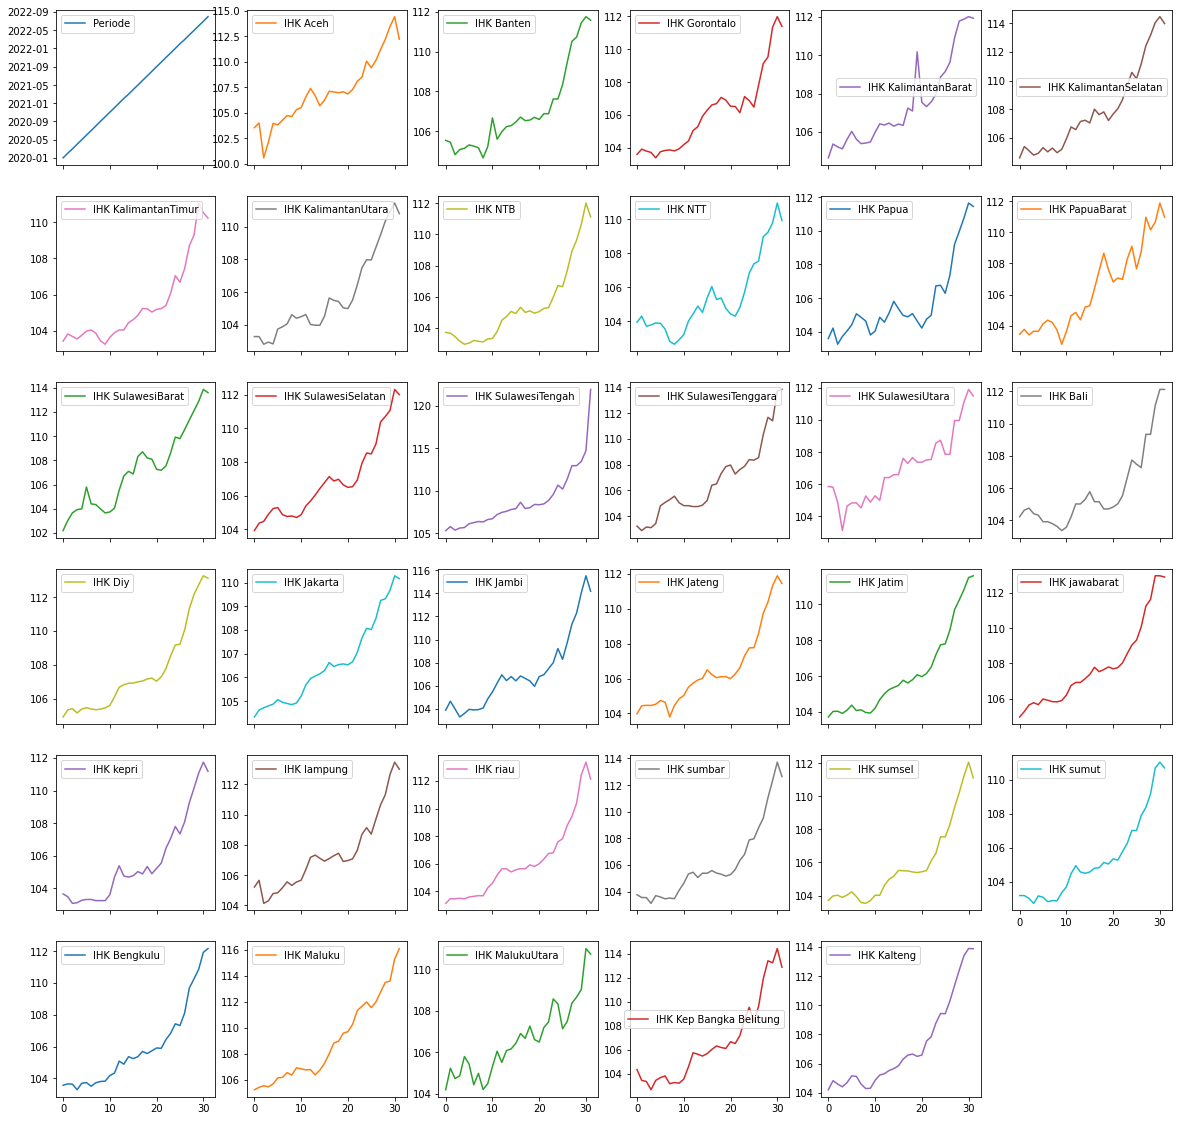

In [ ]:

IHK.plot(subplots=True,layout=(6,6),figsize=(20, 20))

In [ ]:
data_array = np.array(IHK.T.drop('Periode').values)

In [ ]:
IHK.describe().T

count        mean       std     min       25%  \
IHK Aceh                  32.0  107.086250  3.256327  100.57  104.6950   
IHK Banten                32.0  107.024687  2.110216  104.66  105.4075   
IHK Gorontalo             32.0  106.156250  2.411079  103.40  103.9175   
IHK KalimantanBarat       32.0  107.472813  2.276898  104.65  105.6175   
IHK KalimantanSelatan     32.0  108.004375  3.011950  104.62  105.3225   
IHK KalimantanTimur       32.0  105.454062  2.256120  103.25  103.8500   
IHK KalimantanUtara       32.0  105.783750  2.597462  102.80  103.9675   
IHK NTB                   32.0  105.450625  2.526506  102.96  103.4200   
IHK NTT                   32.0  105.417813  2.253089  102.66  103.9050   
IHK Papua                 32.0  105.784063  2.325110  103.26  104.3625   
IHK PapuaBarat            32.0  106.388750  2.698524  102.80  104.0225   
IHK SulawesiBarat         32.0  107.222813  3.279040  102.20  104.0375   
IHK SulawesiSelatan       32.0  106.887812  2.328356  103.92  104.8850   
IHK SulawesiTengah        32.0  108.771563  3.468086  105.32  106.3775   
IHK SulawesiTenggara      32.0  106.740938  2.958950  102.87  104.8075   
IHK SulawesiUtara         32.0  107.020625  2.176389  103.10  105.1925   
IHK Bali                  32.0  105.880937  2.452536  103.37  104.2975   
IHK Diy                   32.0  107.570937  2.529276  104.91  105.4375   
IHK Jakarta               32.0  106.585625  1.758023  104.33  104.9425   
IHK Jambi                 32.0  107.133438  3.269449  103.30  104.5200   
IHK Jateng                32.0  106.520625  2.265615  103.80  104.7175   
IHK Jatim                 32.0  106.168750  2.387979  103.72  104.1150   
IHK jawabarat             32.0  107.842500  2.326002  104.96  105.9050   
IHK kepri                 32.0  105.678781  2.611598  103.07  103.4375   
IHK lampung               32.0  107.458750  2.514782  104.13  105.5475   
IHK riau                  32.0  106.197500  2.793036  103.11  103.6675   
IHK sumbar                32.0  106.134375  2.913736  103.11  103.7425   
IHK sumsel                32.0  105.927188  2.467108  103.53  104.0200   
IHK sumut                 32.0  105.362812  2.457019  102.73  103.1900   
IHK Bengkulu              32.0  105.956875  2.562905  103.28  103.7825   
IHK Maluku                32.0  108.905000  3.168147  105.22  106.3575   
IHK MalukuUtara           32.0  106.617188  1.765668  104.19  105.2900   
IHK Kep Bangka Belitung   32.0  106.626875  3.426690  102.67  103.6475   
IHK Kalteng               32.0  107.165625  3.031810  104.20  104.8350   

                             50%       75%     max  
IHK Aceh                 106.900  108.7100  114.42  
IHK Banten               106.545  107.6200  111.76  
IHK Gorontalo            106.215  106.9425  111.97  
IHK KalimantanBarat      106.440  108.9300  112.00  
IHK KalimantanSelatan    107.230  109.7850  114.45  
IHK KalimantanTimur      104.730  106.2225  111.06  
IHK KalimantanUtara      104.805  107.6025  111.46  
IHK NTB                  104.975  106.1400  112.01  
IHK NTT                  104.645  106.2450  110.95  
IHK Papua                104.930  106.4000  111.65  
IHK PapuaBarat           105.820  108.3675  111.89  
IHK SulawesiBarat        107.145  108.9825  113.87  
IHK SulawesiSelatan      106.510  108.0525  112.31  
IHK SulawesiTengah       107.910  109.7275  121.92  
IHK SulawesiTenggara     105.975  108.0650  113.85  
IHK SulawesiUtara        106.940  107.8600  111.91  
IHK Bali                 105.020  106.7975  112.11  
IHK Diy                  106.955  108.6900  113.27  
IHK Jakarta              106.375  107.7500  110.29  
IHK Jambi                106.545  108.0725  115.52  
IHK Jateng               106.030  107.4150  111.89  
IHK Jatim                105.550  107.3300  111.60  
IHK jawabarat            107.450  108.6725  112.97  
IHK kepri                104.885  107.1225  111.74  
IHK lampung              107.080  108.6950  113.46  
IHK riau                 105.620  106.9800  113.37  
IHK

### KMEANS Time Series

In [ ]:
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10000000, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    hasil=pd.DataFrame({"Cluster":[1,2,3,4,5,6,7,8,9,10]})
    print(distortions)
    print(silhouette)  

  0%|          | 0/10 [00:00<?, ?it/s]

[12.20421783623761, 7.867456372418355, 6.548666989753069, 4.988655669131202, 4.579302377117129, 3.934590857794627, 3.619114237470508, 3.1987282388744043, 2.748066222622686, 2.5147608519917792]
[0.32265719885569843, 0.2803110678669411, 0.2388794035301884, 0.19340415130169566, 0.11734130856222184, 0.10910484344545339, 0.029828386858914913, 0.03447989141182687, 0.04590519301584801]


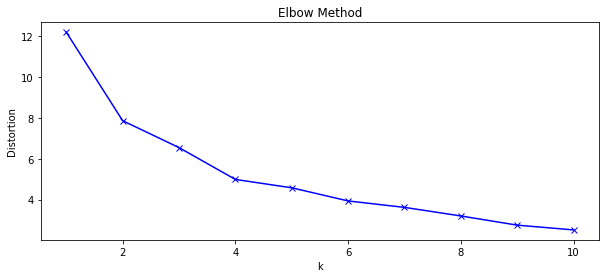

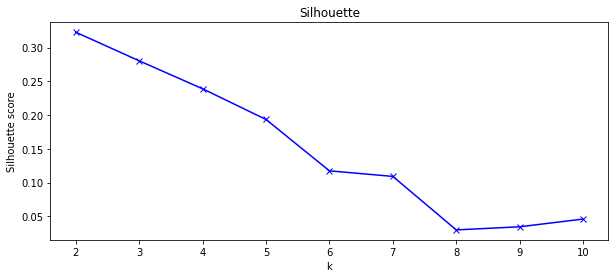

In [ ]:
get_kmeans_results(data=data_array, max_clusters=10, metric='dtw', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[40.37332707006925, 21.767204472222254, 16.111654262138185, 12.801938136554623, 11.953109390433095, 11.050222625727212, 10.284849283056808, 7.82646546960785, 7.235416057843146, 6.715216548039226]
[0.3642328984210965, 0.35253728346402724, 0.2831670038675505, 0.21863020924431814, 0.19805604958846731, 0.17396006450721413, 0.19517397237976392, 0.1906950526626121, 0.18138346419844684]


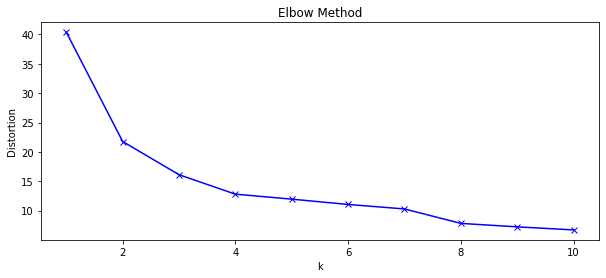

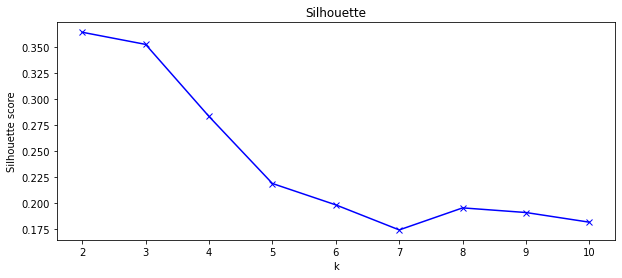

In [ ]:
get_kmeans_results(data=data_array, max_clusters=10, metric='euclidean', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[885.8305388159149, 831.8985096913841, 1026.4885386113592, 1139.1238723404665, 1169.916610216772, 1230.4195514303492, 1221.0467580252907, 1274.109836702348, 1294.2630911722633, 1316.856962184579]
[0.48341021424401687, 0.35253728346402724, 0.2838086874654996, 0.1596882417645047, 0.08211258107009067, 0.07335680746203775, 0.014761943518074236, 0.007731637235049458, -0.04335835592733441]


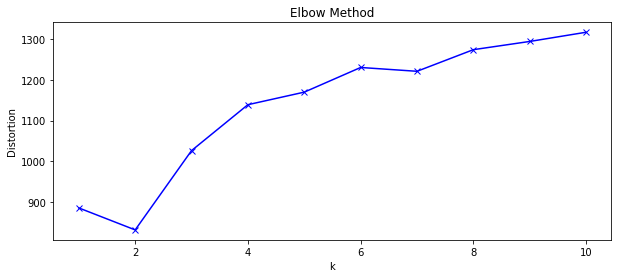

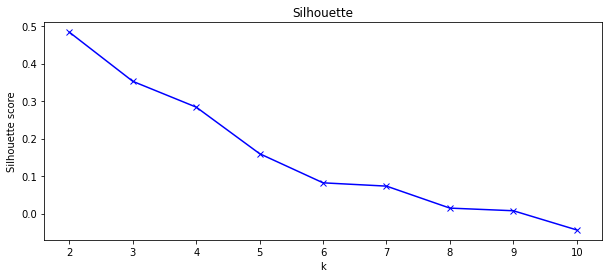

In [ ]:
get_kmeans_results(data=data_array, max_clusters=10, metric='softdtw', seed=123)

In [ ]:
kmeans_model = TimeSeriesKMeans(n_clusters=3, metric='euclidean', n_jobs=-1, max_iter=10000, random_state=1234)
cluster_labels = kmeans_model.fit_predict(data_array)

In [ ]:
hasilIHK=pd.DataFrame()
hasilIHK["Provinsi"]=IHK.columns.drop('Periode')
hasilIHK["Cluster"]=cluster_labels

In [ ]:
hasilIHK

Provinsi  Cluster
0                  IHK Aceh        0
1                IHK Banten        0
2             IHK Gorontalo        1
3       IHK KalimantanBarat        0
4     IHK KalimantanSelatan        0
5       IHK KalimantanTimur        1
6       IHK KalimantanUtara        1
7                   IHK NTB        1
8                   IHK NTT        1
9                 IHK Papua        1
10           IHK PapuaBarat        1
11        IHK SulawesiBarat        0
12      IHK SulawesiSelatan        0
13       IHK SulawesiTengah        2
14     IHK SulawesiTenggara        0
15        IHK SulawesiUtara        0
16                 IHK Bali        1
17                  IHK Diy        0
18              IHK Jakarta        1
19                IHK Jambi        0
20               IHK Jateng        1
21                IHK Jatim        1
22            IHK jawabarat        0
23                IHK kepri        1
24              IHK lampung        0
25                 IHK riau        1
26               IHK sumbar        1
27               IHK sumsel        1
28                IHK sumut        1
29             IHK Bengkulu        1
30               IHK Maluku        2
31          IHK MalukuUtara        1
32  IHK Kep Bangka Belitung        0
33              IHK Kalteng        0

In [ ]:
hasilIHK["Cluster"].value_counts()

1    18
0    14
2     2
Name: Cluster, dtype: int64

In [ ]:
ts_clustered = [ data_array[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]

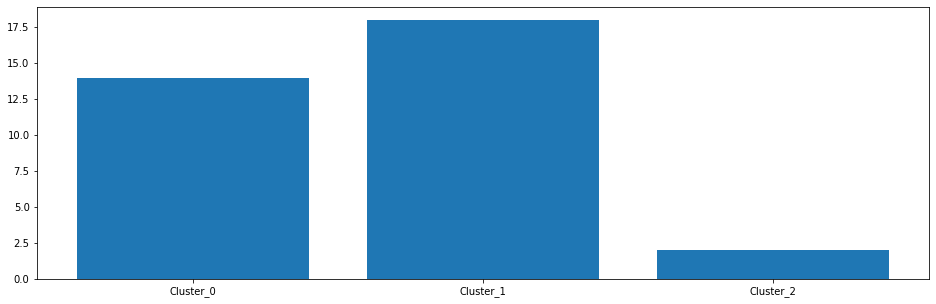

In [ ]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered))]
samples_in_cluster = [val.shape[0] for val in ts_clustered]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

In [ ]:
def plot_cluster_ts(current_cluster):
    """
    Plots time series in a cluster 

    current_cluster: np.array
        Cluster with time series 
    Returns:
    -------
    None 
    """
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),4,
        figsize=(20, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)
    for indx, series in enumerate(current_cluster):
        ax[indx].plot(series)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show();

==========Cluster number: 0==========


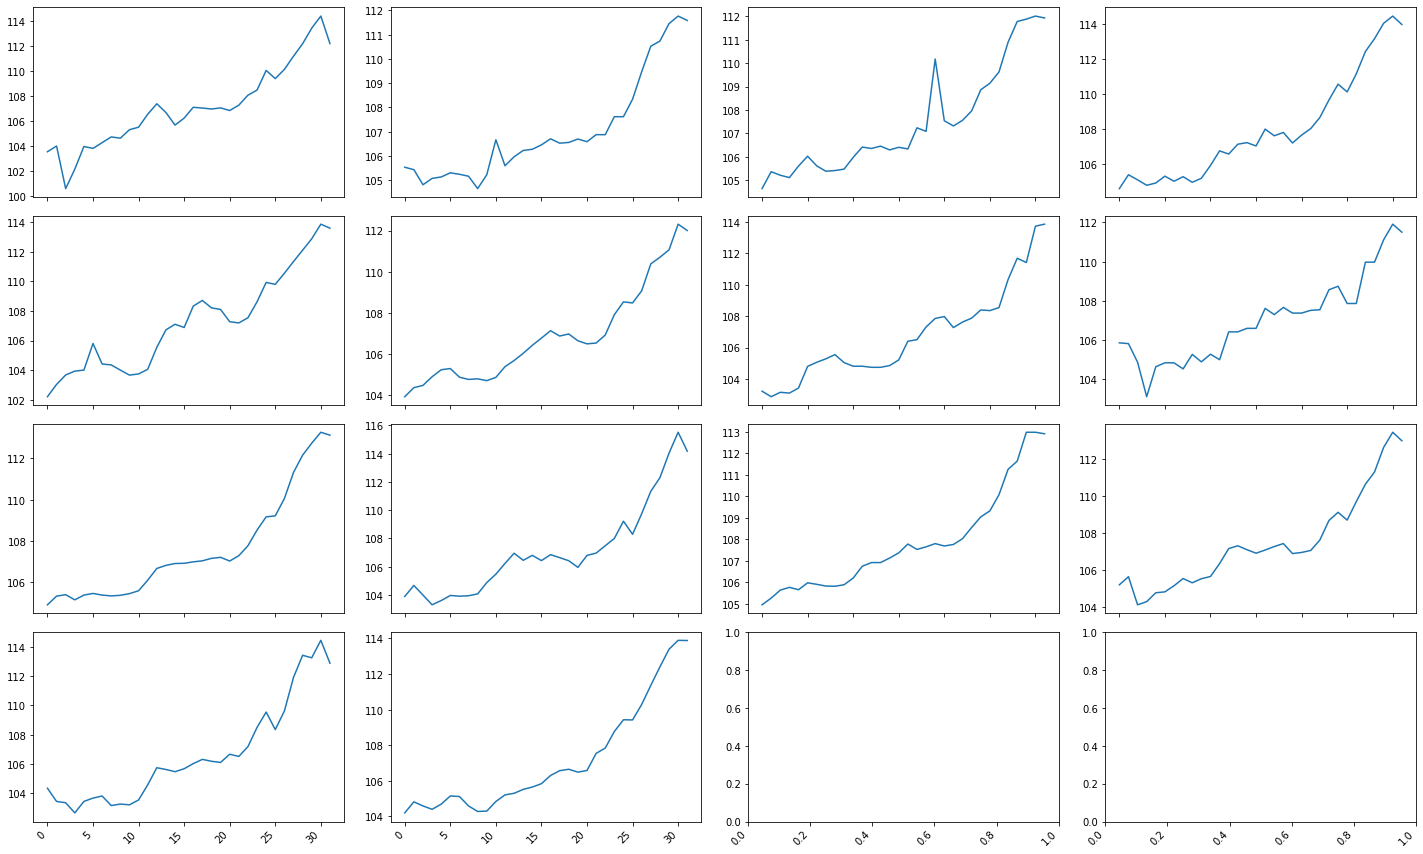

==========Cluster number: 1==========


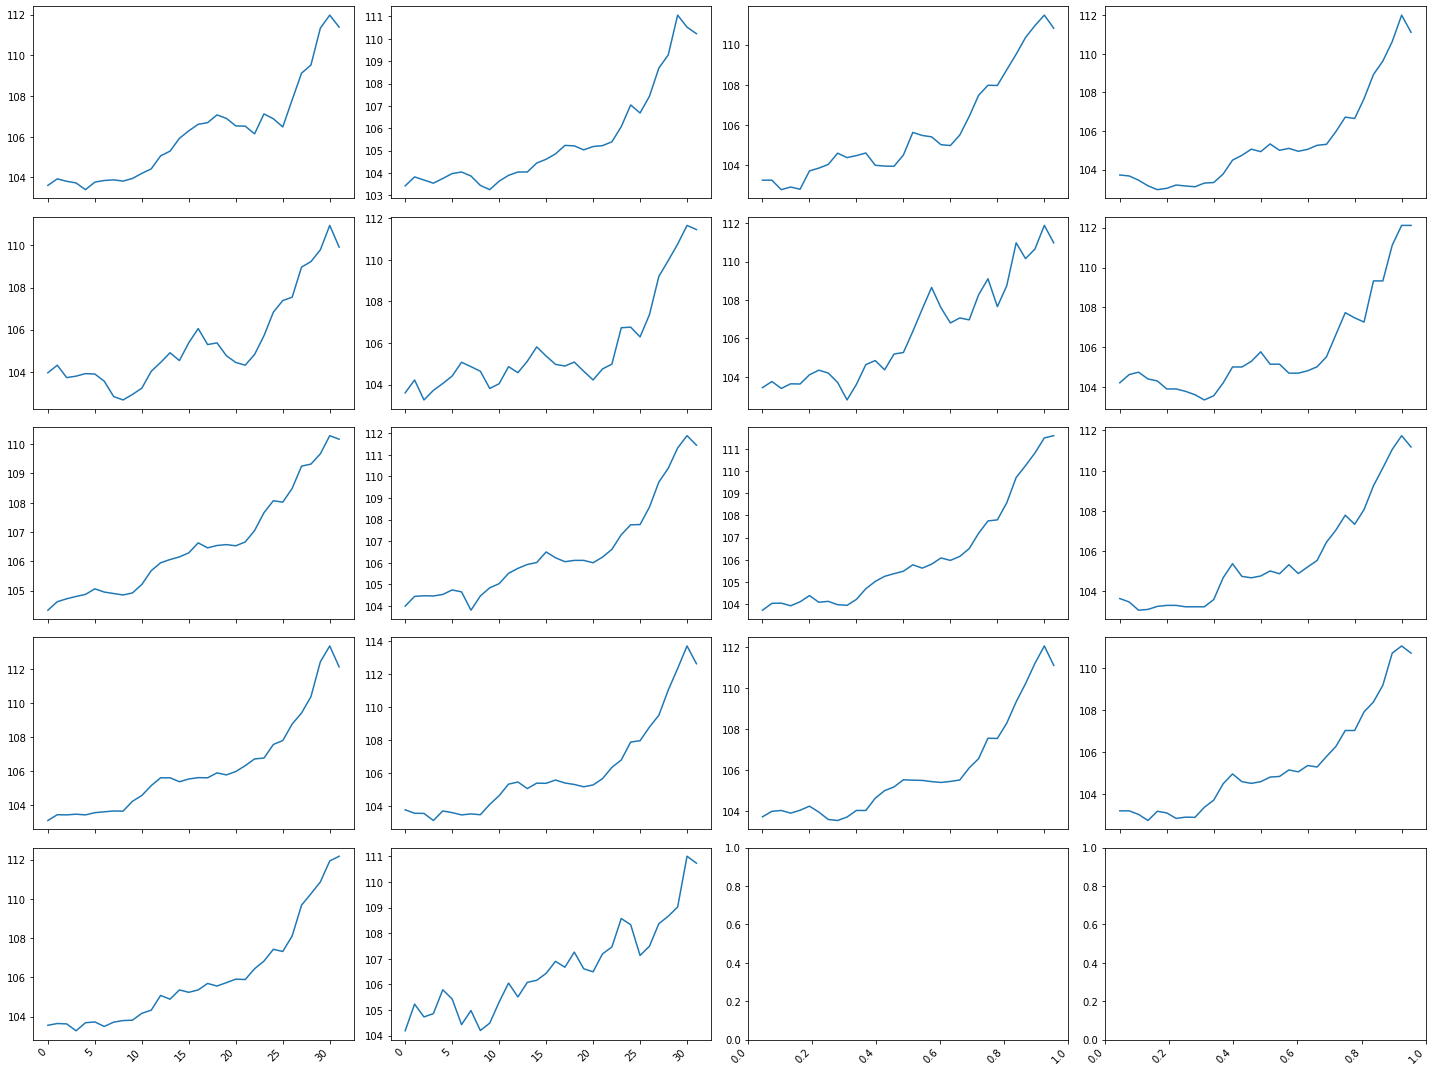

==========Cluster number: 2==========


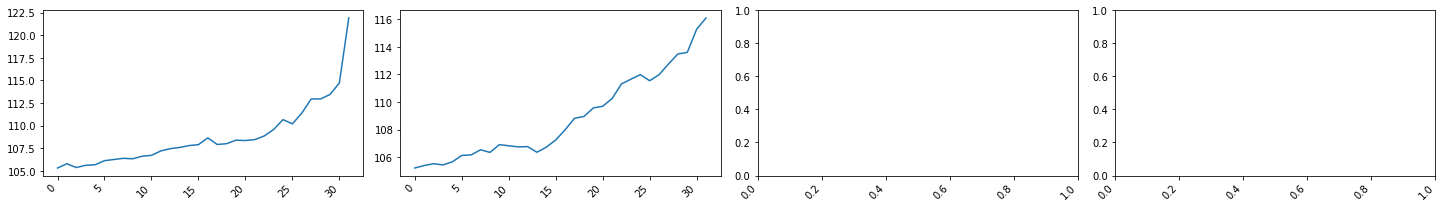

In [ ]:
for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

In [ ]:
sz=data_array.shape[1]

Text(0, 0.5, 'IHK')

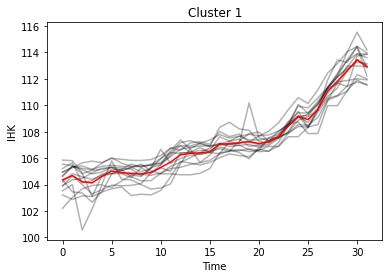

In [ ]:
plt.plot(ts_clustered[0].T,"k-",alpha=0.3)
plt.plot(kmeans_model.cluster_centers_[0], "r-")
plt.title("Cluster 1")
plt.xlabel('Time')
plt.ylabel('IHK')

Text(0, 0.5, 'IHK')

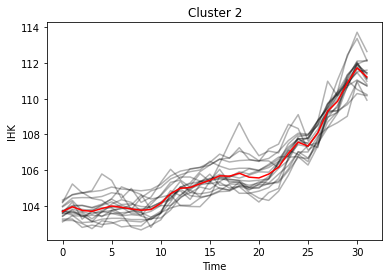

In [ ]:
plt.plot(ts_clustered[1].T,"k-",alpha=0.3)
plt.plot(kmeans_model.cluster_centers_[1], "r-")
plt.title("Cluster 2")
plt.xlabel('Time')
plt.ylabel('IHK')

Text(0, 0.5, 'IHK')

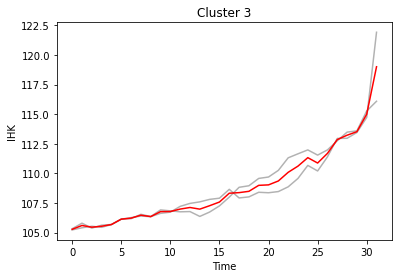

In [ ]:
plt.plot(ts_clustered[2].T,"k-",alpha=0.3)
plt.plot(kmeans_model.cluster_centers_[2], "r-")
plt.title("Cluster 3")
plt.xlabel('Time')
plt.ylabel('IHK')

### Kernel KMEANS Time Series

In [ ]:
def get_kernelKmeans_results(data, max_clusters=10, seed=23):
    """
    Runs KMedoid n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        KernelKMeans_model = KernelKMeans(n_clusters=K,  kernel='gak', n_jobs=-1, max_iter=10000, random_state=seed)
        KernelKMeans_model.fit(data)
        distortions.append(KernelKMeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, KernelKMeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    hasil=pd.DataFrame({"Cluster":[1,2,3,4,5,6,7,8,9,10]})
    print(distortions)
    print(silhouette)  

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeser

[65.90606575277761, 63.93721692103309, 61.97015849924132, 59.92055072004049, 57.96911740657776, 55.72633954334423, 53.99137314767845, 51.93414846017576, 49.99638500578566, 47.81599444871341]
[-0.0062798020880737195, -0.04323680922248513, -0.10540795570657183, -0.1324751758067086, -0.19434246742406822, -0.2330847729187411, -0.19624398049726943, -0.25646940700094056, -0.2788542199924421]


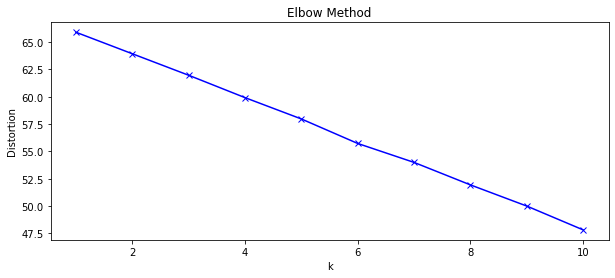

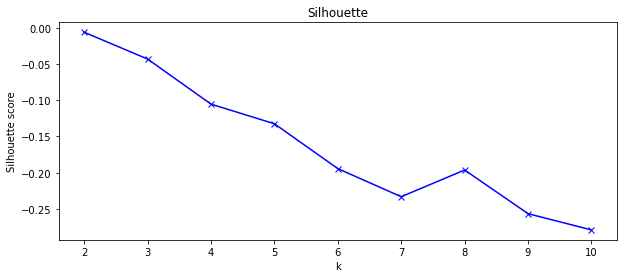

In [ ]:
get_kernelKmeans_results(data_array, max_clusters=10, seed=23)

## Inflasi

In [ ]:
Inflasi = pd.DataFrame()

In [ ]:
Inflasi[["Periode","Inflasi Aceh"]]=dataaceh[["Periode","Inflasi"]]
Inflasi["Inflasi Banten"]=dataBanten["Inflasi"]
Inflasi["Inflasi Gorontalo"]=dataGorontalo["Inflasi"]
Inflasi["Inflasi KalimantanBarat"]=dataKalimantanBarat["Inflasi"]
Inflasi["Inflasi KalimantanSelatan"]=dataKalimantanSelatan["Inflasi"]
Inflasi["Inflasi KalimantanTimur"]=dataKalimantanTimur[["Inflasi"]]
Inflasi["Inflasi KalimantanUtara"]=dataKalimantanUtara[["Inflasi"]]
Inflasi["Inflasi NTB"]=dataNTB[["Inflasi"]]
Inflasi["Inflasi NTT"]=dataNTT[["Inflasi"]]
Inflasi["Inflasi Papua"]=dataPapua[["Inflasi"]]
Inflasi["Inflasi PapuaBarat"]=dataPapuaBarat[["Inflasi"]]
Inflasi["Inflasi SulawesiBarat"]=dataSulawesiBarat[["Inflasi"]]
Inflasi["Inflasi SulawesiSelatan"]=dataSulawesiSelatan[["Inflasi"]]
Inflasi["Inflasi SulawesiTengah"]=dataSulawesiTengah[["Inflasi"]]
Inflasi["Inflasi SulawesiTenggara"]=dataSulawesiTenggara[["Inflasi"]]
Inflasi["Inflasi SulawesiUtara"]=dataSulawesiUtara[["Inflasi"]]
Inflasi["Inflasi Bali"]=databali[["Inflasi"]]
Inflasi["Inflasi Diy"]=datadiy[["Inflasi"]]
Inflasi["Inflasi Jakarta"]=datajakarta[["Inflasi"]]
Inflasi["Inflasi Jambi"]=datajambi[["Inflasi"]]
Inflasi["Inflasi Jateng"]=datajateng[["Inflasi"]]
Inflasi["Inflasi Jatim"]=datajatim[["Inflasi"]]
Inflasi["Inflasi jawabarat"]=datajawabarat[["Inflasi"]]
Inflasi["Inflasi kepri"]=datakepri[["Inflasi"]]
Inflasi["Inflasi lampung"]=datalampung[["Inflasi"]]
Inflasi["Inflasi riau"]=datariau[["Inflasi"]]
Inflasi["Inflasi sumbar"]=datasumbar[["Inflasi"]]
Inflasi["Inflasi sumsel"]=datasumsel[["Inflasi"]]
Inflasi["Inflasi sumut"]=datasumut[["Inflasi"]]
Inflasi["Inflasi Bengkulu"]=dataBengkulu[["Inflasi"]]
Inflasi["Inflasi Maluku"]=dataMaluku[["Inflasi"]]
Inflasi["Inflasi MalukuUtara"]=dataMalukuUtara[["Inflasi"]]
Inflasi["Inflasi Kep Bangka Belitung"]=datakepbb[["Inflasi"]]
Inflasi[["Inflasi Kalteng"]]=dataKalteng[["Inflasi"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb28011690>,
      dtype=object)

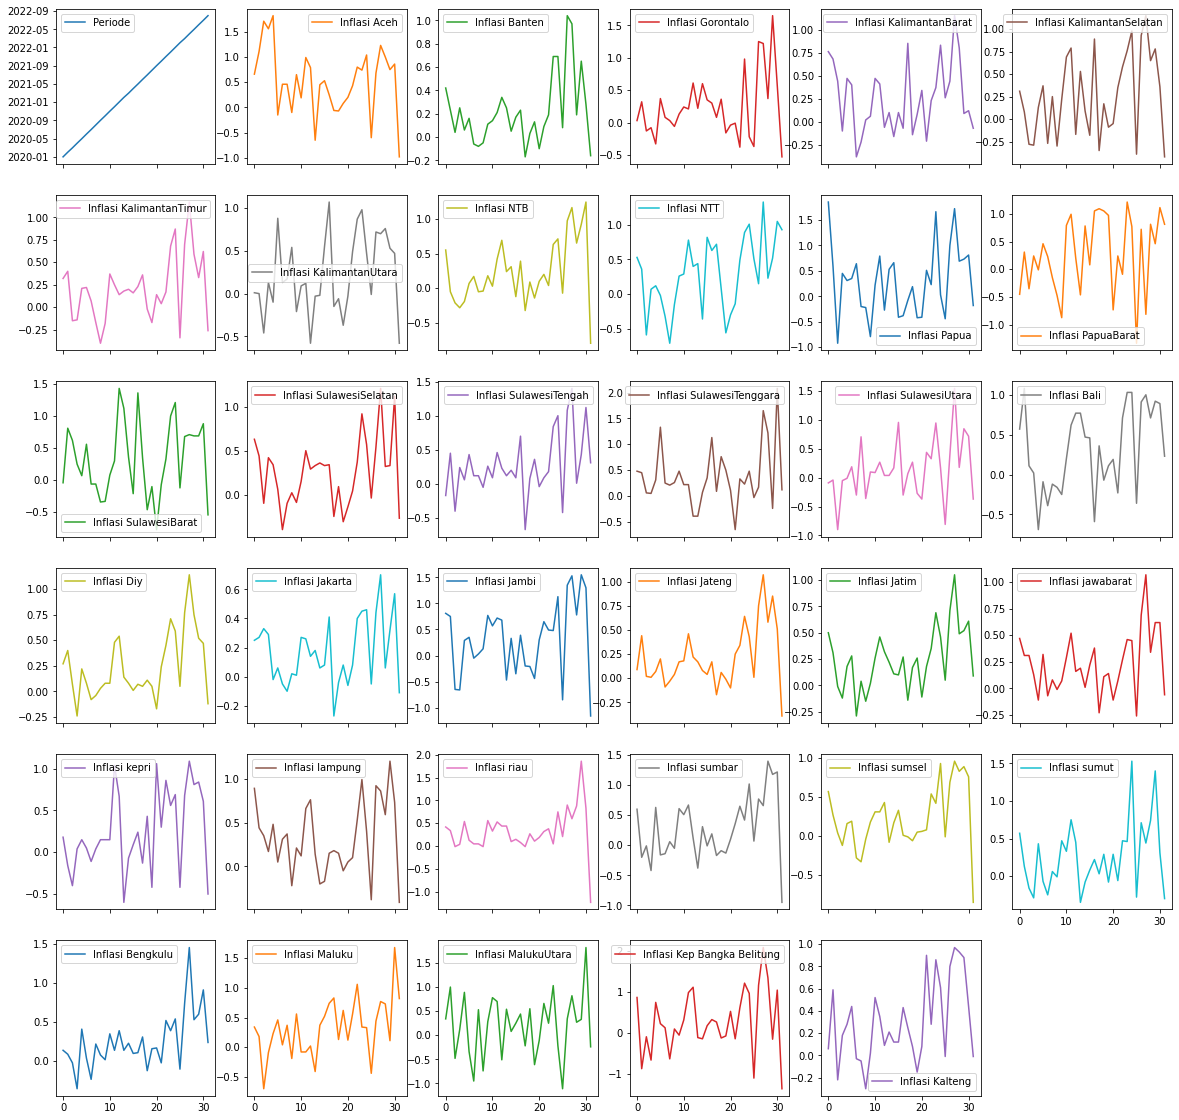

In [ ]:
Inflasi.plot(subplots=True,layout=(6,6),figsize=(20, 20))

In [ ]:
Inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Periode                      32 non-null     datetime64[ns]
 1   Inflasi Aceh                 32 non-null     float64       
 2   Inflasi Banten               32 non-null     float64       
 3   Inflasi Gorontalo            32 non-null     float64       
 4   Inflasi KalimantanBarat      32 non-null     float64       
 5   Inflasi KalimantanSelatan    32 non-null     float64       
 6   Inflasi KalimantanTimur      32 non-null     float64       
 7   Inflasi KalimantanUtara      32 non-null     float64       
 8   Inflasi NTB                  32 non-null     float64       
 9   Inflasi NTT                  32 non-null     float64       
 10  Inflasi Papua                32 non-null     float64       
 11  Inflasi PapuaBarat           32 non-null     fl

In [ ]:
Inflasi

Periode  Inflasi Aceh  Inflasi Banten  Inflasi Gorontalo  \
0  2020-01-01          0.66            0.42               0.03   
1  2020-02-01          1.11            0.23               0.32   
2  2020-03-01          1.71            0.04              -0.13   
3  2020-04-01          1.56            0.25              -0.08   
4  2020-05-01          1.82            0.06              -0.33   
5  2020-06-01         -0.15            0.16               0.37   
6  2020-07-01          0.46           -0.06               0.08   
7  2020-08-01          0.46           -0.08               0.03   
8  2020-09-01         -0.10           -0.05              -0.06   
9  2020-10-01          0.65            0.11               0.13   
10 2020-11-01          0.19            0.14               0.24   
11 2020-12-01          0.99            0.21               0.21   
12 2021-01-01          0.79            0.34               0.61   
13 2021-02-01         -0.65            0.25               0.22   
14 2021-03-01          0.45            0.05               0.60   
15 2021-04-01          0.53            0.17               0.35   
16 2021-05-01          0.25            0.23               0.30   
17 2021-06-01         -0.06           -0.17               0.08   
18 2021-07-01         -0.07            0.03               0.36   
19 2021-08-01          0.08            0.13              -0.16   
20 2021-09-01          0.20           -0.10              -0.04   
21 2021-10-01          0.43            0.09              -0.01   
22 2021-11-01          0.80            0.19              -0.38   
23 2021-12-01          0.74            0.69               0.98   
24 2022-01-01          1.04            0.69              -0.22   
25 2022-02-01         -0.60            0.08              -0.37   
26 2022-03-01          0.68            1.04               1.25   
27 2022-04-01          1.23            0.97               1.22   
28 2022-05-01          1.00            0.19               0.37   
29 2022-06-01          0.75            0.65               1.65   
30 2022-07-01          0.86            0.28               0.57   
31 2022-08-01         -0.98           -0.16              -0.53   

    Inflasi KalimantanBarat  Inflasi KalimantanSelatan  \
0                      0.76                       0.31   
1                      0.68                       0.08   
2                      0.44                      -0.28   
3                     -0.10                      -0.29   
4                      0.47                       0.13   
5                      0.40                       0.37   
6                     -0.38                      -0.27   
7                     -0.22                       0.25   
8                      0.02                      -0.30   
9                      0.06                       0.22   
10                     0.47                       0.69   
11                     0.41                       0.79   
12                    -0.06                      -0.17   
13                     0.10                       0.53   
14                    -0.16                       0.09   
15                     0.10                      -0.18   
16                    -0.07                       0.89   
17                     0.85                      -0.35   
18                    -0.14                       0.17   
19                     0.08                      -0.09   
20                     0.34                      -0.05   
21                    -0.21                       0.35   
22                     0.23                       0.58   
23                     0.37                       0.76   
24                     0.83                       0.98   
25                     0.26                      -0.39   
26                     0.44                       0.93   
27                     1.15                       1.15   
28                     0.80                       0.65   
29                     0.09                       0.78   
30                     0.12  

In [ ]:
data_array2 = np.array(Inflasi.T.drop('Periode').values)

In [ ]:
Inflasi.describe().T

count      mean       std   min     25%    50%  \
Inflasi Aceh                  32.0  0.525937  0.649565 -0.98  0.1625  0.590   
Inflasi Banten                32.0  0.220937  0.298160 -0.17  0.0475  0.165   
Inflasi Gorontalo             32.0  0.239375  0.496140 -0.53 -0.0650  0.170   
Inflasi KalimantanBarat       32.0  0.251875  0.371235 -0.38 -0.0625  0.175   
Inflasi KalimantanSelatan     32.0  0.258437  0.462574 -0.42 -0.1725  0.235   
Inflasi KalimantanTimur       32.0  0.205937  0.356858 -0.40 -0.0500  0.190   
Inflasi KalimantanUtara       32.0  0.221250  0.454446 -0.58 -0.0375  0.125   
Inflasi NTB                   32.0  0.234375  0.459817 -0.79 -0.0550  0.135   
Inflasi NTT                   32.0  0.295625  0.516370 -0.71 -0.0500  0.325   
Inflasi Papua                 32.0  0.288750  0.685625 -0.92 -0.2325  0.270   
Inflasi PapuaBarat            32.0  0.270313  0.685445 -1.33 -0.2000  0.275   
Inflasi SulawesiBarat         32.0  0.325000  0.573833 -0.77 -0.0775  0.315   
Inflasi SulawesiSelatan       32.0  0.250625  0.388387 -0.40 -0.0525  0.325   
Inflasi SulawesiTengah        32.0  0.272500  0.452812 -0.67  0.0750  0.190   
Inflasi SulawesiTenggara      32.0  0.372188  0.578729 -0.65  0.0850  0.240   
Inflasi SulawesiUtara         32.0  0.144687  0.514223 -0.90 -0.1350  0.095   
Inflasi Bali                  32.0  0.319063  0.520250 -0.69 -0.0975  0.295   
Inflasi Diy                   32.0  0.243750  0.318522 -0.24  0.0500  0.095   
Inflasi Jakarta               32.0  0.171563  0.224917 -0.27  0.0025  0.110   
Inflasi Jambi                 32.0  0.323125  0.694111 -1.16 -0.2025  0.370   
Inflasi Jateng                32.0  0.220625  0.315257 -0.39  0.0175  0.170   
Inflasi Jatim                 32.0  0.246250  0.291556 -0.29  0.0475  0.240   
Inflasi jawabarat             32.0  0.232812  0.289641 -0.26  0.0550  0.205   
Inflasi kepri                 32.0  0.252188  0.481381 -0.60 -0.0800  0.150   
Inflasi lampung               32.0  0.324063  0.408931 -0.41  0.0875  0.260   
Inflasi riau                  32.0  0.321562  0.475558 -1.23  0.0725  0.295   
Inflasi sumbar                32.0  0.276250  0.525613 -0.95 -0.1000  0.155   
Inflasi sumsel                32.0  0.231250  0.403011 -0.85 -0.0100  0.175   
Inflasi sumut                 32.0  0.257188  0.450507 -0.35 -0.0725  0.255   
Inflasi Bengkulu              32.0  0.255625  0.349764 -0.35  0.0700  0.165   
Inflasi Maluku                32.0  0.324375  0.473633 -0.70  0.0350  0.340   
Inflasi MalukuUtara           32.0  0.202813  0.637238 -1.11 -0.2250  0.275   
Inflasi Kep Bangka Belitung   32.0  0.275000  0.762839 -1.36 -0.1250  0.205   
Inflasi Kalteng               32.0  0.303750  0.359953 -0.30  0.0500  0.230   

                                75%   max  
Inflasi Aceh                 0.8925  1.82  
Inflasi Banten               0.2575  1.04  
Inflasi Gorontalo            0.3700  1.65  
Inflasi KalimantanBarat      0.4475  1.15  
Inflasi KalimantanSelatan    0.6600  1.15  
Inflasi KalimantanTimur      0.3625  1.17  
Inflasi KalimantanUtara      0.5425  1.07  
Inflasi NTB                  0.5700  1.24  
Inflasi NTT                  0.6525  1.33  
Inflasi Papua                0.6675  1.85  
Inflasi PapuaBarat           0.8100  1.21  
Inflasi SulawesiBarat        0.6950  1.43  
Inflasi SulawesiSelatan      0.4250  1.21  
Inflasi SulawesiTengah       0.4350  1.40  
Inflasi SulawesiTenggara     0.4800  2.08  
Inflasi SulawesiUtara        0.3475  1.55  
Inflasi Bali                 0.7700  1.08  
Inflasi Diy                  0.4725  1.14  
Inflasi Jakarta              0.3225  0.70  
Inflasi Jambi                0.7550  1.55  
Inflasi Jateng               0.4325  1.07  
Inflasi Jatim                0.4600  1.05  
Inflasi jawabarat            0.3975  1.07  
Inflasi kepri                0.6725  1.09  
Inflasi lampung              0.6075  1.20  
Inflasi riau                 0.5325  1.86  
Inflasi sumbar               0.6350  1.40  
Inflasi sumsel               0.

### KMEANS Time Series

  0%|          | 0/10 [00:00<?, ?it/s]

[2.6876519169585786, 2.295910066175507, 2.124844359237196, 1.8652715302477034, 1.7468474597905121, 1.6278927281159097, 1.4948998314638173, 1.288976135137374, 1.2122178018040408, 1.0906832151815131]
[0.14306296881673605, 0.06244871185743096, 0.06851138874962022, 0.05377139276350983, 0.047736063391471954, -0.00659316448323527, 0.05036252730437515, 0.051835367752166614, 0.05809021624310596]


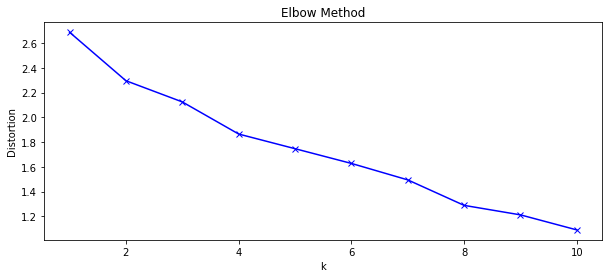

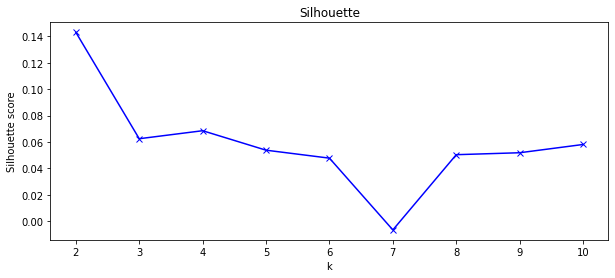

In [ ]:
get_kmeans_results(data=data_array2, max_clusters=10, metric='dtw', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[4.126117041522491, 4.0070206773618535, 3.7294195772058827, 3.316310056925996, 2.951533823529412, 2.6068615546218483, 2.423068572984749, 2.095698062283737, 1.7887659722222222, 1.5655308356676003]
[0.003708374315153266, 0.012091578779227084, 0.030476010388589915, 0.04443686269785446, 0.06698364601052632, 0.06186976013478141, 0.1021089372286269, 0.11381177274093475, 0.11592096170560022]


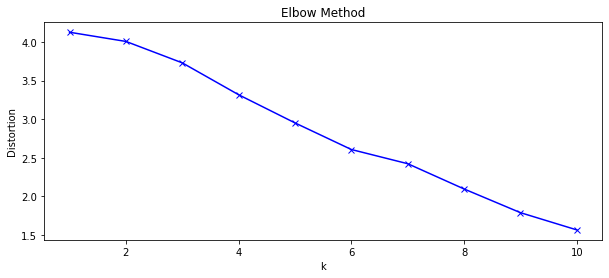

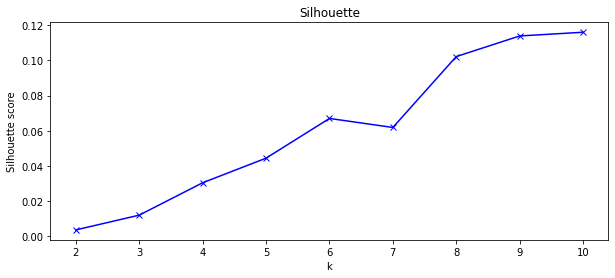

In [ ]:
get_kmeans_results(data=data_array2, max_clusters=10, metric='euclidean', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[1879.9211057014945, 1900.4452832992297, 1914.0597277761663, 1909.6411934742248, 1933.9845620674798, inf, inf, inf, inf, inf]
[0.25301670008797256, -0.0007413358935617403, 0.027808121414221648, 0.091880556233862, 0.1933813732483382, 0.11649071871869443, 0.1368335477083677, 0.12858687597561644, 0.029181751197470414]


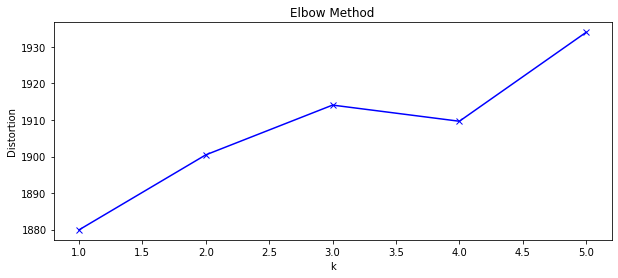

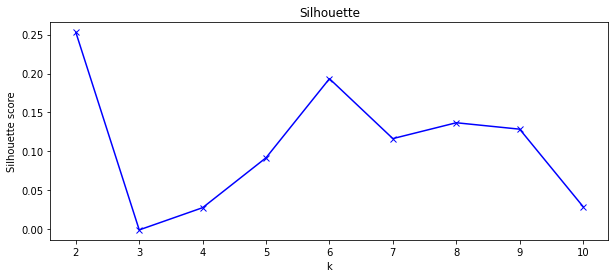

In [ ]:
get_kmeans_results(data=data_array2, max_clusters=10, metric='softdtw', seed=123)

In [ ]:
kmeans_model2 = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10000, random_state=1234)
cluster_labels2 = kmeans_model2.fit_predict(data_array2)

In [ ]:
hasilInflasi=pd.DataFrame()
hasilInflasi["Provinsi"]=Inflasi.columns.drop('Periode')
hasilInflasi["Cluster"]=cluster_labels2

In [ ]:
hasilInflasi

Provinsi  Cluster
0                  Inflasi Aceh        0
1                Inflasi Banten        1
2             Inflasi Gorontalo        1
3       Inflasi KalimantanBarat        1
4     Inflasi KalimantanSelatan        1
5       Inflasi KalimantanTimur        1
6       Inflasi KalimantanUtara        1
7                   Inflasi NTB        1
8                   Inflasi NTT        1
9                 Inflasi Papua        2
10           Inflasi PapuaBarat        1
11        Inflasi SulawesiBarat        1
12      Inflasi SulawesiSelatan        1
13       Inflasi SulawesiTengah        1
14     Inflasi SulawesiTenggara        1
15        Inflasi SulawesiUtara        1
16                 Inflasi Bali        1
17                  Inflasi Diy        1
18              Inflasi Jakarta        1
19                Inflasi Jambi        0
20               Inflasi Jateng        1
21                Inflasi Jatim        1
22            Inflasi jawabarat        1
23                Inflasi kepri        1
24              Inflasi lampung        1
25                 Inflasi riau        1
26               Inflasi sumbar        1
27               Inflasi sumsel        1
28                Inflasi sumut        1
29             Inflasi Bengkulu        1
30               Inflasi Maluku        1
31          Inflasi MalukuUtara        0
32  Inflasi Kep Bangka Belitung        0
33              Inflasi Kalteng        1

In [ ]:
hasilInflasi["Cluster"].value_counts()

1    29
0     4
2     1
Name: Cluster, dtype: int64

In [ ]:
ts_clustered_inflasi = [ data_array2[(cluster_labels2 == lable), :] for lable in np.unique(cluster_labels2)]

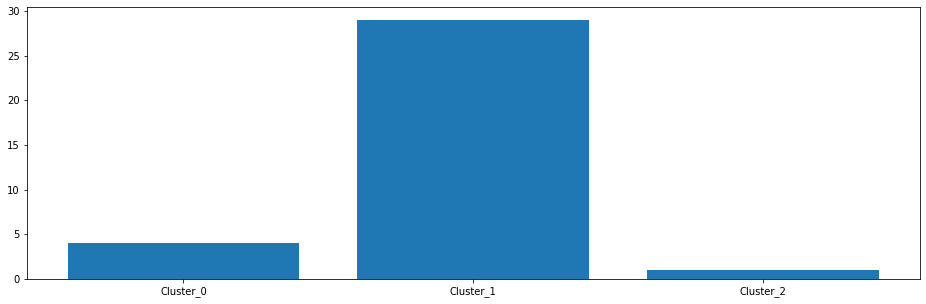

In [ ]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered_inflasi))]
samples_in_cluster = [val.shape[0] for val in ts_clustered_inflasi]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

==========Cluster number: 0==========


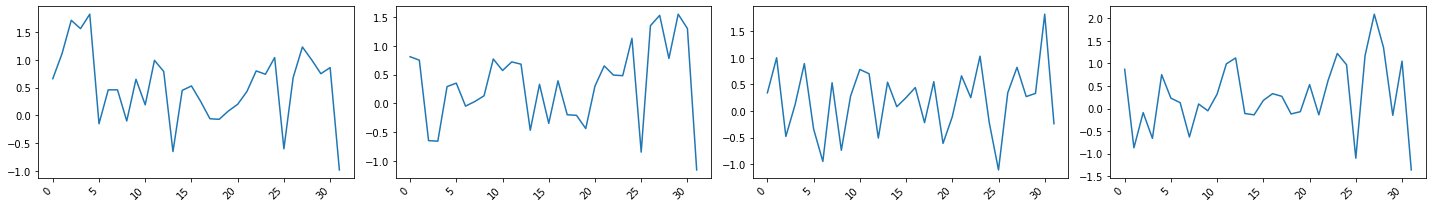

==========Cluster number: 1==========


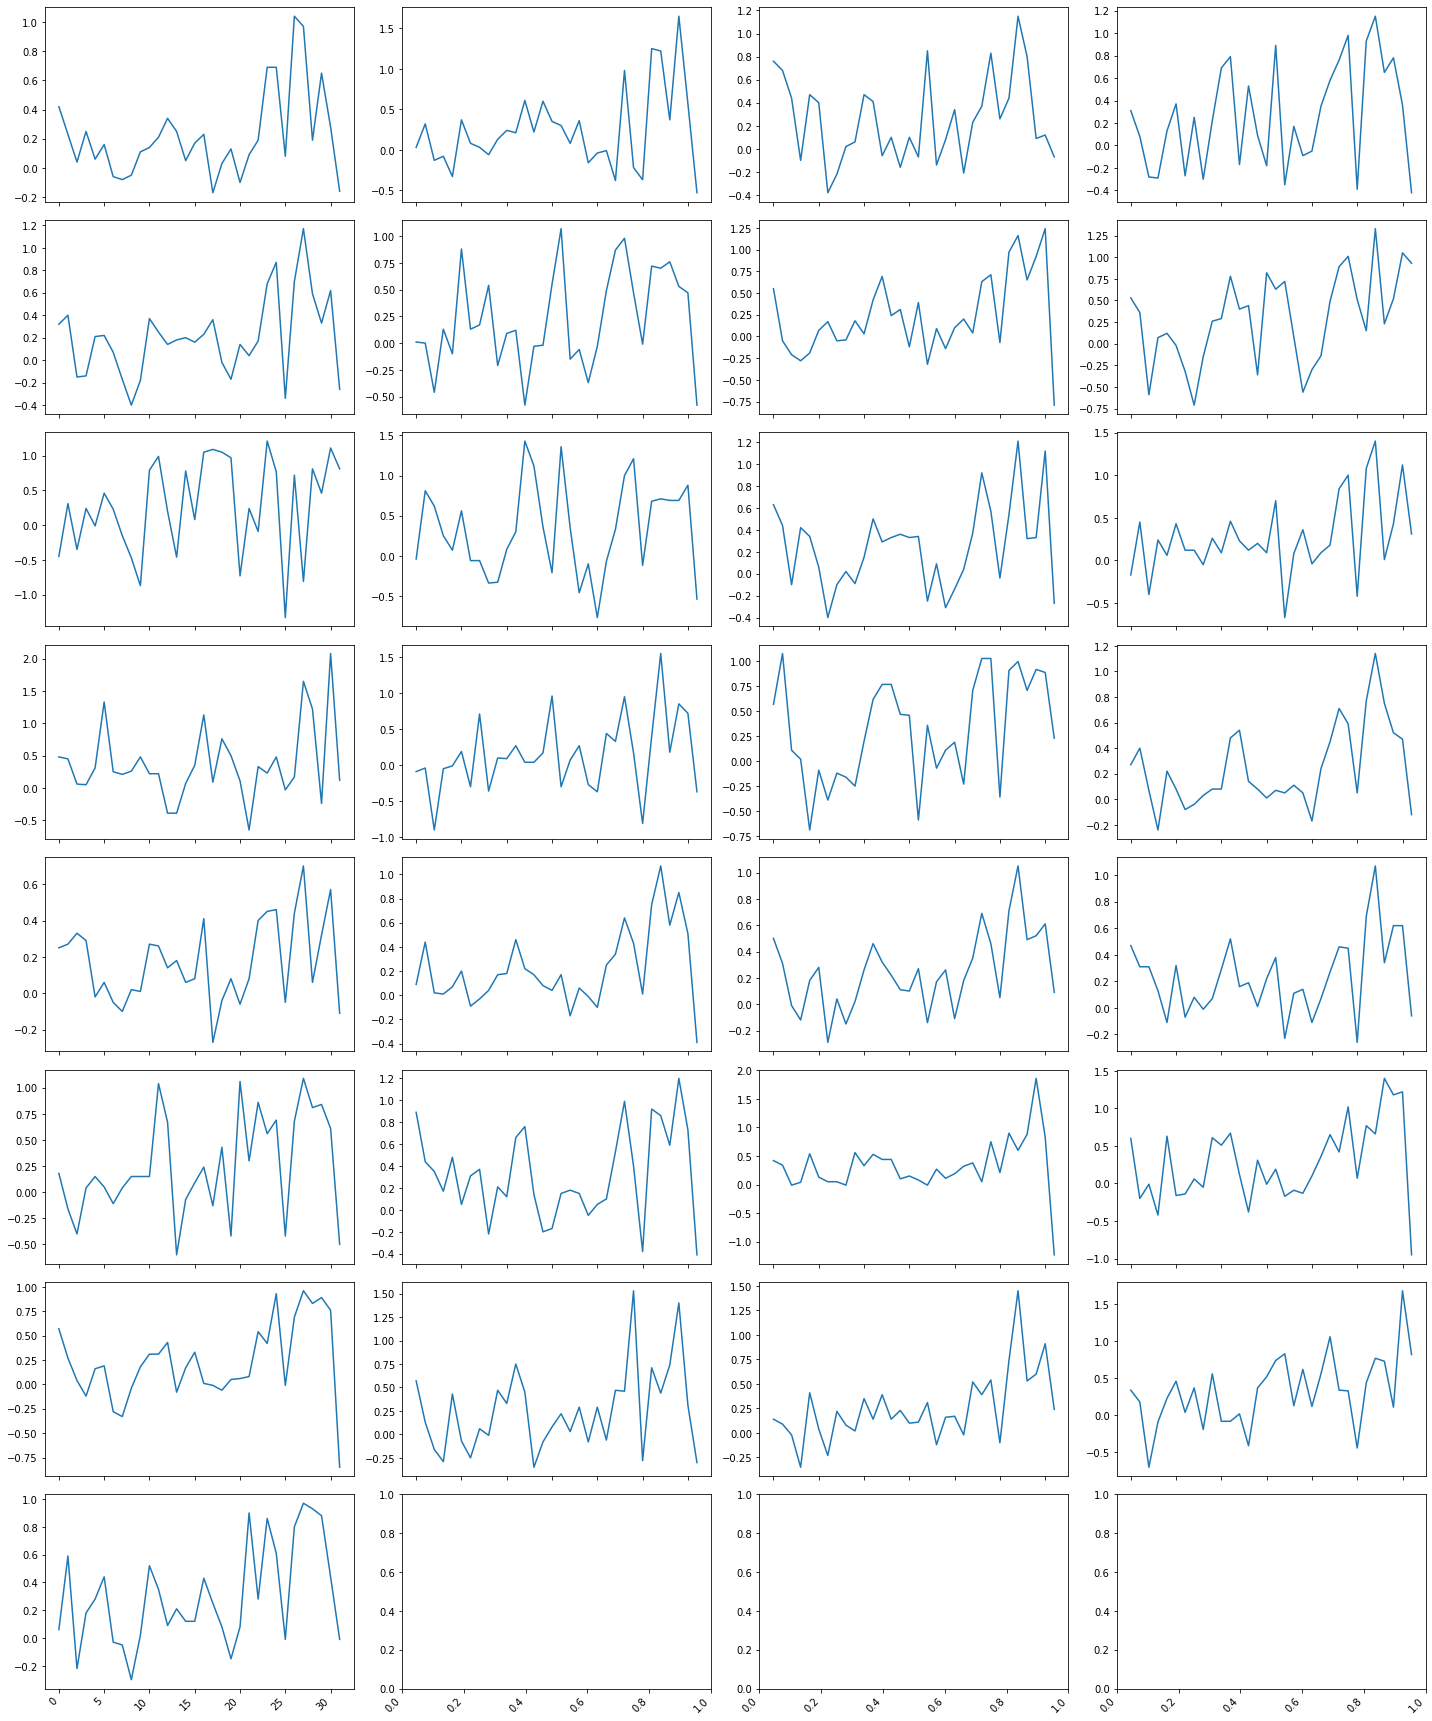

==========Cluster number: 2==========


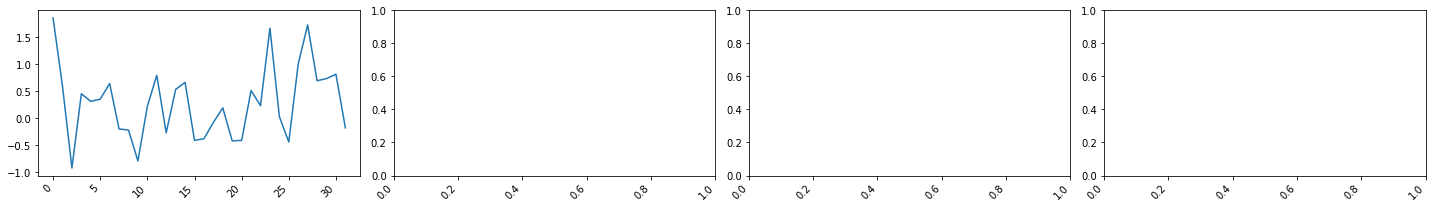

In [ ]:
for cluster in range(len(ts_clustered_inflasi)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered_inflasi[cluster])

Text(0, 0.5, 'Inflasi')

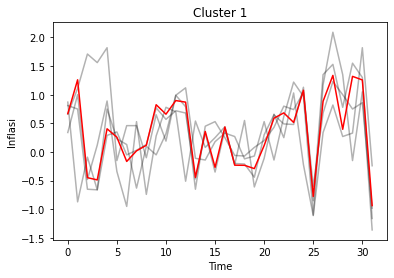

In [ ]:
plt.plot(ts_clustered_inflasi[0].T,"k-",alpha=0.3)
plt.plot(kmeans_model2.cluster_centers_[0], "r-")
plt.title("Cluster 1")
plt.xlabel('Time')
plt.ylabel('Inflasi')

Text(0, 0.5, 'Inflasi')

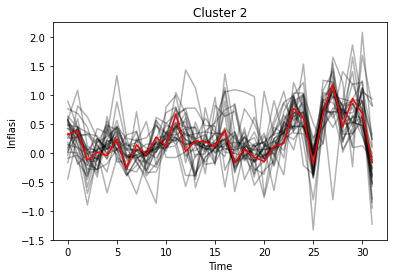

In [ ]:
plt.plot(ts_clustered_inflasi[1].T,"k-",alpha=0.3)
plt.plot(kmeans_model2.cluster_centers_[1], "r-")
plt.title("Cluster 2")
plt.xlabel('Time')
plt.ylabel('Inflasi')

Text(0, 0.5, 'Inflasi')

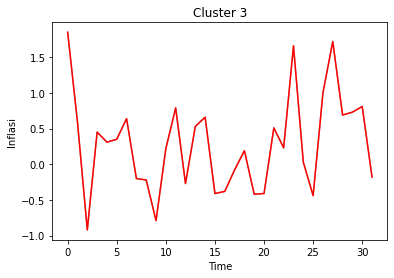

In [ ]:
plt.plot(ts_clustered_inflasi[2].T,"k-",alpha=0.3)
plt.plot(kmeans_model2.cluster_centers_[2], "r-")
plt.title("Cluster 3")
plt.xlabel('Time')
plt.ylabel('Inflasi')

### Kernel KMEANS

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeser

[57.91026727229307, 56.5520583601679, 53.181706166369345, 48.459673797842115, 47.07646024489262, 43.40312543593614, 41.949853527932305, 40.995980420963825, 37.560184119682525, 38.59497032061207]
[-0.021242258739831526, 0.007502322573053988, -0.008308090563146488, 0.01983590337348927, -0.02433641914662865, -0.050634591953608615, -0.028814285104243012, -0.0780881746135755, -0.15622787077434447]


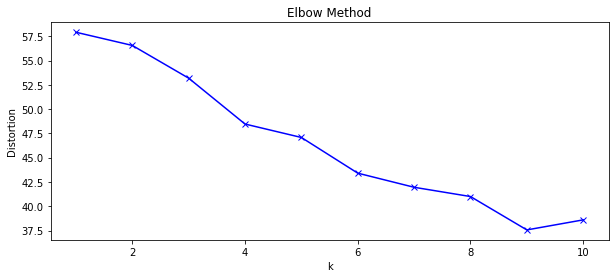

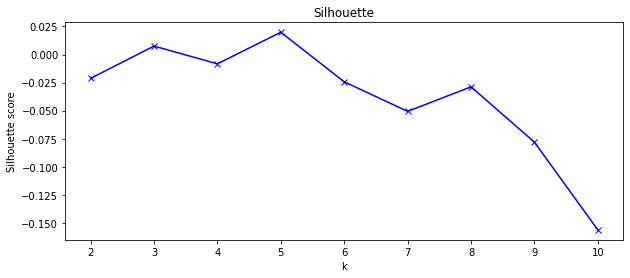

In [ ]:
get_kernelKmeans_results(data_array2, max_clusters=10, seed=23)

## Ekspor

In [ ]:
Ekspor = pd.DataFrame()

In [ ]:
Ekspor[["Periode","Ekspor Aceh"]]=dataaceh[["Periode","Ekspor"]]
Ekspor["Ekspor Banten"]=dataBanten["Ekspor"]
Ekspor["Ekspor Gorontalo"]=dataGorontalo["Ekspor"]
Ekspor["Ekspor KalimantanBarat"]=dataKalimantanBarat["Ekspor"]
Ekspor["Ekspor KalimantanSelatan"]=dataKalimantanSelatan["Ekspor"]
Ekspor["Ekspor KalimantanTimur"]=dataKalimantanTimur[["Ekspor"]]
Ekspor["Ekspor KalimantanUtara"]=dataKalimantanUtara[["Ekspor"]]
Ekspor["Ekspor NTB"]=dataNTB[["Ekspor"]]
Ekspor["Ekspor NTT"]=dataNTT[["Ekspor"]]
Ekspor["Ekspor Papua"]=dataPapua[["Ekspor"]]
Ekspor["Ekspor PapuaBarat"]=dataPapuaBarat[["Ekspor"]]
Ekspor["Ekspor SulawesiBarat"]=dataSulawesiBarat[["Ekspor"]]
Ekspor["Ekspor SulawesiSelatan"]=dataSulawesiSelatan[["Ekspor"]]
Ekspor["Ekspor SulawesiTengah"]=dataSulawesiTengah[["Ekspor"]]
Ekspor["Ekspor SulawesiTenggara"]=dataSulawesiTenggara[["Ekspor"]]
Ekspor["Ekspor SulawesiUtara"]=dataSulawesiUtara[["Ekspor"]]
Ekspor["Ekspor Bali"]=databali[["Ekspor"]]
Ekspor["Ekspor Diy"]=datadiy[["Ekspor"]]
Ekspor["Ekspor Jakarta"]=datajakarta[["Ekspor"]]
Ekspor["Ekspor Jambi"]=datajambi[["Ekspor"]]
Ekspor["Ekspor Jateng"]=datajateng[["Ekspor"]]
Ekspor["Ekspor Jatim"]=datajatim[["Ekspor"]]
Ekspor["Ekspor jawabarat"]=datajawabarat[["Ekspor"]]
Ekspor["Ekspor kepri"]=datakepri[["Ekspor"]]
Ekspor["Ekspor lampung"]=datalampung[["Ekspor"]]
Ekspor["Ekspor riau"]=datariau[["Ekspor"]]
Ekspor["Ekspor sumbar"]=datasumbar[["Ekspor"]]
Ekspor["Ekspor sumsel"]=datasumsel[["Ekspor"]]
Ekspor["Ekspor sumut"]=datasumut[["Ekspor"]]
Ekspor["Ekspor Bengkulu"]=dataBengkulu[["Ekspor"]]
Ekspor["Ekspor Maluku"]=dataMaluku[["Ekspor"]]
Ekspor["Ekspor MalukuUtara"]=dataMalukuUtara[["Ekspor"]]
Ekspor["Ekspor Kep Bangka Belitung"]=datakepbb[["Ekspor"]]
Ekspor[["Ekspor Kalteng"]]=dataKalteng[["Ekspor"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb22c20450>,
      dtype=object)

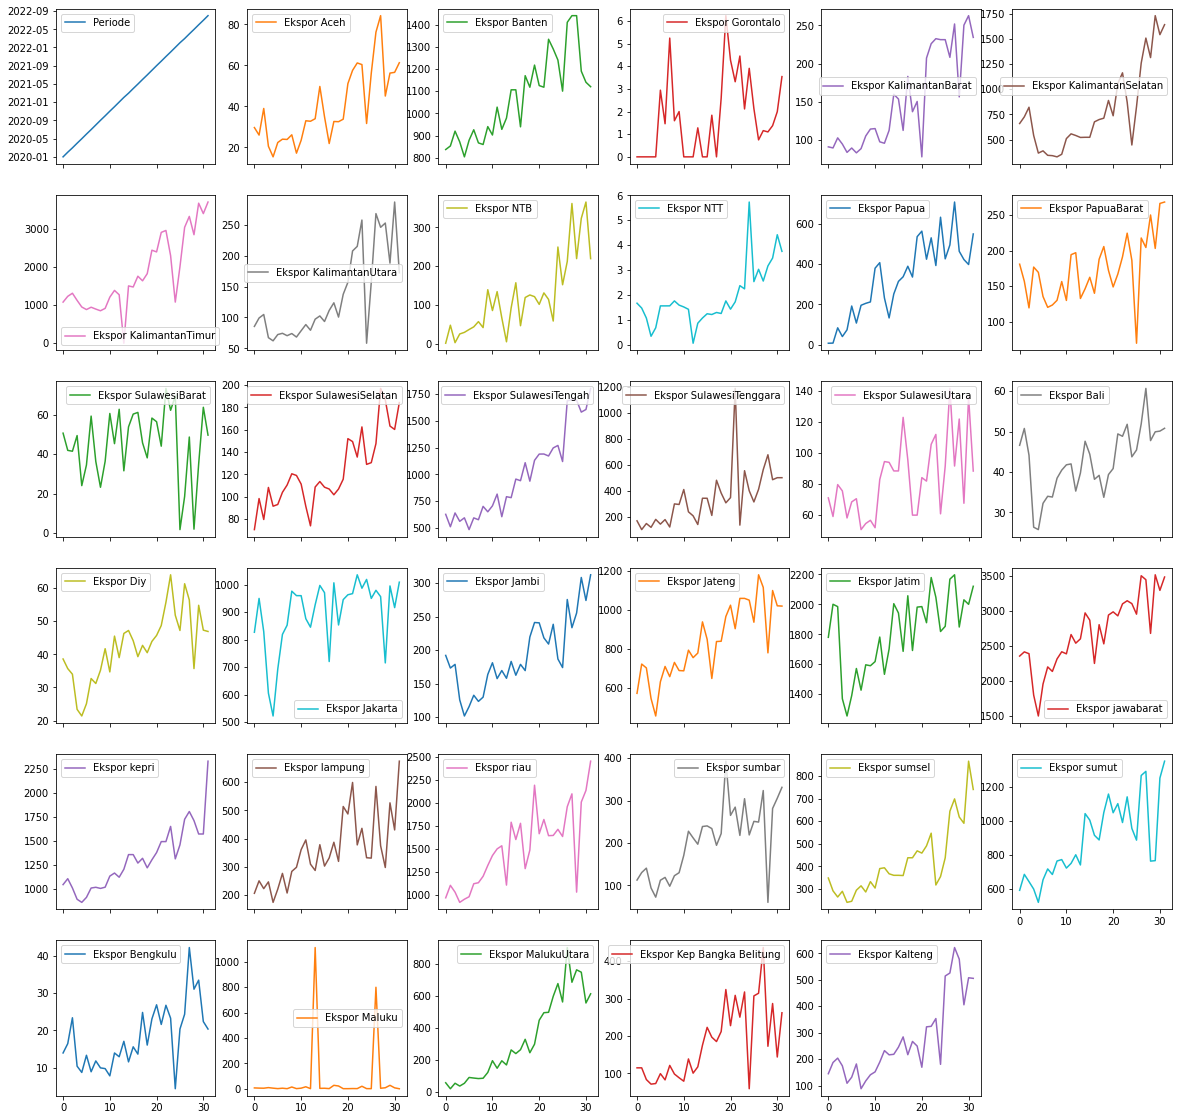

In [ ]:
Ekspor.plot(subplots=True,layout=(6,6),figsize=(20, 20))

In [ ]:
Ekspor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Periode                     32 non-null     datetime64[ns]
 1   Ekspor Aceh                 32 non-null     float64       
 2   Ekspor Banten               32 non-null     float64       
 3   Ekspor Gorontalo            32 non-null     float64       
 4   Ekspor KalimantanBarat      32 non-null     float64       
 5   Ekspor KalimantanSelatan    32 non-null     float64       
 6   Ekspor KalimantanTimur      32 non-null     float64       
 7   Ekspor KalimantanUtara      32 non-null     float64       
 8   Ekspor NTB                  32 non-null     float64       
 9   Ekspor NTT                  32 non-null     float64       
 10  Ekspor Papua                32 non-null     float64       
 11  Ekspor PapuaBarat           32 non-null     float64       
 

In [ ]:
Ekspor.describe().T

count         mean         std          min  \
Ekspor Aceh                  32.0    39.698789   17.746888    15.359581   
Ekspor Banten                32.0  1068.634281  185.773446   804.020000   
Ekspor Gorontalo             32.0     1.728095    1.748036     0.000000   
Ekspor KalimantanBarat       32.0   150.993125   62.463495    77.980000   
Ekspor KalimantanSelatan     32.0   784.505938  409.262730   328.520000   
Ekspor KalimantanTimur       32.0  1825.255099  974.258398     1.293160   
Ekspor KalimantanUtara       32.0   133.088437   70.430737    58.290000   
Ekspor NTB                   32.0   121.461594   99.895587     1.184000   
Ekspor NTT                   32.0     1.914256    1.190376     0.051989   
Ekspor Papua                 32.0   326.677188  188.130222     7.990000   
Ekspor PapuaBarat            32.0   173.072500   44.579973    69.960000   
Ekspor SulawesiBarat         32.0    44.971875   17.659298     1.860000   
Ekspor SulawesiSelatan       32.0   122.972188   32.715458    70.670000   
Ekspor SulawesiTengah        32.0   999.501875  405.575075   486.200000   
Ekspor SulawesiTenggara      32.0   340.456250  218.958378   100.650000   
Ekspor SulawesiUtara         32.0    83.127500   24.356762    50.480000   
Ekspor Bali                  32.0    42.658325    7.874360    25.756700   
Ekspor Diy                   32.0    42.428125   10.226034    21.400000   
Ekspor Jakarta               32.0   895.301250  125.962796   521.750000   
Ekspor Jambi                 32.0   193.336250   54.725551   101.809000   
Ekspor Jateng                32.0   837.359063  187.015117   456.420000   
Ekspor Jatim                 32.0  1815.492028  256.286360  1254.576090   
Ekspor jawabarat             32.0  2698.071406  508.105219  1503.770000   
Ekspor kepri                 32.0  1306.033344  319.445185   859.500000   
Ekspor lampung               32.0   357.165632  122.862146   174.210000   
Ekspor riau                  32.0  1510.329440  418.660557   921.010000   
Ekspor sumbar                32.0   204.908125   84.174321    60.200000   
Ekspor sumsel                32.0   423.763891  155.040733   240.834500   
Ekspor sumut                 32.0   889.751375  227.837485   519.190000   
Ekspor Bengkulu              32.0    18.159496    8.408235     4.422700   
Ekspor Maluku                32.0    65.987028  236.992291     0.076140   
Ekspor MalukuUtara           32.0   329.601875  257.906221    19.710000   
Ekspor Kep Bangka Belitung   32.0   181.013750   98.035208    59.290000   
Ekspor Kalteng               32.0   273.974375  149.992431    88.440000   

                                    25%          50%          75%          max  
Ekspor Aceh                   25.490032    33.360527    56.189230    84.278828  
Ekspor Banten                915.532500  1102.990000  1174.737500  1440.000000  
Ekspor Gorontalo               0.000000     1.419436     2.678783     6.234235  
Ekspor KalimantanBarat        95.515000   126.030000   212.665000   262.750000  
Ekspor KalimantanSelatan     518.270000   687.225000   930.107500  1729.510000  
Ekspor KalimantanTimur      1081.030000  1491.835000  2545.180000  3707.600000  
Ekspor KalimantanUtara        77.490000   101.560000   176.327500   286.940000  
Ekspor NTB                    45.640750   107.875500   153.431500   365.620000  
Ekspor NTT                     1.246261     1.555379     2.409758     5.733900  
Ekspor Papua                 195.120000   358.460000   435.442500   707.570000  
Ekspor PapuaBarat            138.982500   170.895000   198.615000   268.280000  
Ekspor SulawesiBarat          35.967500    47.175000    59.482500    73.220000  
Ekspor SulawesiSelatan       103.492500   112.560000   148.090000   197.050000  
Ekspor SulawesiTengah        638.072500   939.425000  1204.200000  1800.760000  
Ekspor SulawesiTenggara      175.647500   310.710000   429.032500  1190.040000  
Ekspor SulawesiUtara          60.430000    82.230000    93.905000   141.380000  
Ekspor Bali              

In [ ]:
data_array3 = np.array(Ekspor.T.drop('Periode').values)

### KMEANS Time Series

  0%|          | 0/10 [00:00<?, ?it/s]

[8556562.66192143, 1970560.552729967, 876588.6678484369, 628241.7949543535, 481155.27660625475, 284362.5095984849, 235120.33211896347, 199569.55336270787, 151208.11734734933, 106323.95839342322]
[0.6288684081353644, 0.6077905061990933, 0.57750976170286, 0.5810541298538867, 0.47782358008224035, 0.42764876208748687, 0.33032725064680246, 0.3634574590258055, 0.3897730397756641]


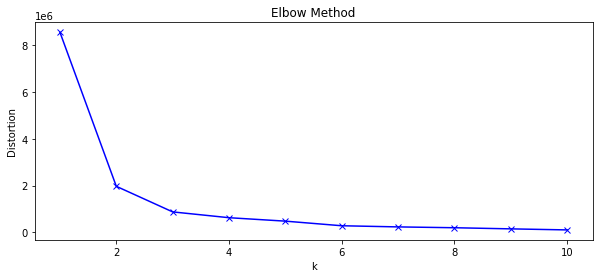

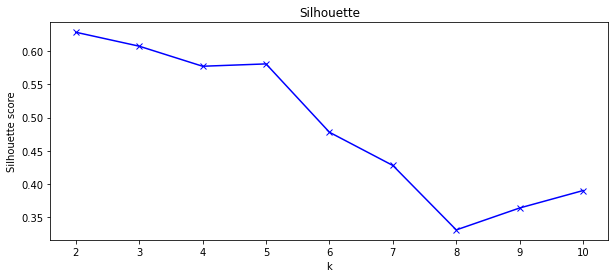

In [ ]:
get_kmeans_results(data=data_array3, max_clusters=10, metric='dtw', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[14664716.107400281, 4735410.509037379, 2022022.3060874979, 1678381.6081016036, 968181.6236543084, 648263.7628043438, 470145.11923221947, 368584.12672741304, 316960.502395499, 244864.58412168978]
[0.6458928080925602, 0.6554417443210926, 0.6263493301724652, 0.6321580113171246, 0.47120985724270753, 0.45966603599269634, 0.43630376983788444, 0.419858656155685, 0.34701234534360614]


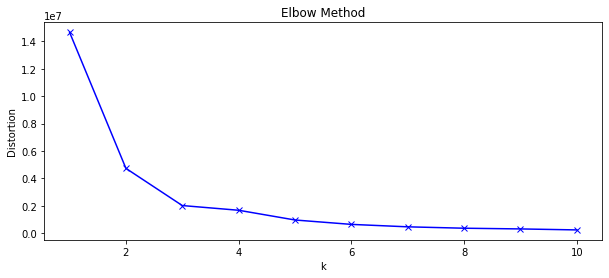

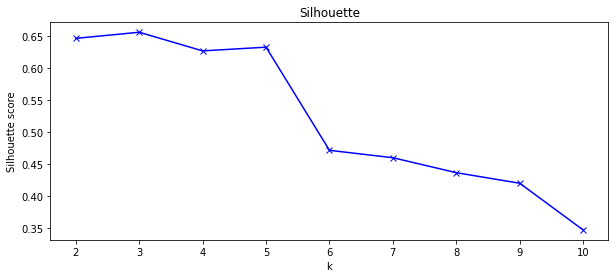

In [ ]:
get_kmeans_results(data=data_array3, max_clusters=10, metric='euclidean', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[276406792480990.94, 8639951735529.121, 1570422633165.3845, 744378022827.351, 327678058753.6398, 214600525954.60828, 160051634370.22977, 107791926664.75449, 90777762406.04347, 29554707430.636063]
[0.6288684081353644, 0.5878210678738084, 0.57750976170286, 0.5810541298538867, 0.41653419237525113, 0.3623595146522536, 0.3703919582530379, 0.3634574590258055, 0.3897730397756641]


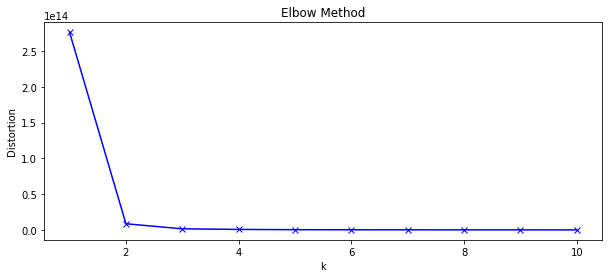

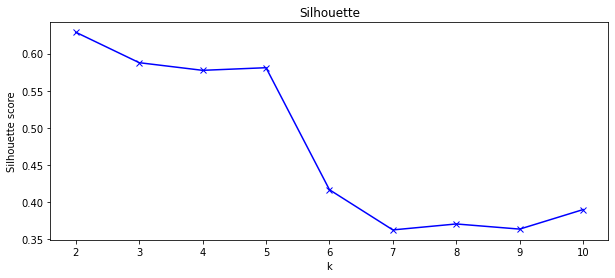

In [ ]:
get_kmeans_results(data=data_array3, max_clusters=10, metric='softdtw', seed=123)

In [ ]:
kmeans_model3 = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10000, random_state=1234)
cluster_labels3 = kmeans_model3.fit_predict(data_array3)

In [ ]:
hasilEkspor=pd.DataFrame()
hasilEkspor["Provinsi"]=Ekspor.columns.drop('Periode')
hasilEkspor["Cluster"]=cluster_labels3

In [ ]:
hasilEkspor

Provinsi  Cluster
0                  Ekspor Aceh        0
1                Ekspor Banten        2
2             Ekspor Gorontalo        0
3       Ekspor KalimantanBarat        0
4     Ekspor KalimantanSelatan        2
5       Ekspor KalimantanTimur        1
6       Ekspor KalimantanUtara        0
7                   Ekspor NTB        0
8                   Ekspor NTT        0
9                 Ekspor Papua        0
10           Ekspor PapuaBarat        0
11        Ekspor SulawesiBarat        0
12      Ekspor SulawesiSelatan        0
13       Ekspor SulawesiTengah        2
14     Ekspor SulawesiTenggara        0
15        Ekspor SulawesiUtara        0
16                 Ekspor Bali        0
17                  Ekspor Diy        0
18              Ekspor Jakarta        2
19                Ekspor Jambi        0
20               Ekspor Jateng        2
21                Ekspor Jatim        1
22            Ekspor jawabarat        1
23                Ekspor kepri        2
24              Ekspor lampung        0
25                 Ekspor riau        2
26               Ekspor sumbar        0
27               Ekspor sumsel        0
28                Ekspor sumut        2
29             Ekspor Bengkulu        0
30               Ekspor Maluku        0
31          Ekspor MalukuUtara        0
32  Ekspor Kep Bangka Belitung        0
33              Ekspor Kalteng        0

In [ ]:
hasilEkspor['Cluster'].value_counts()

0    23
2     8
1     3
Name: Cluster, dtype: int64

In [ ]:
ts_clustered_ekspor = [ data_array3[(cluster_labels3 == lable), :] for lable in np.unique(cluster_labels3)]

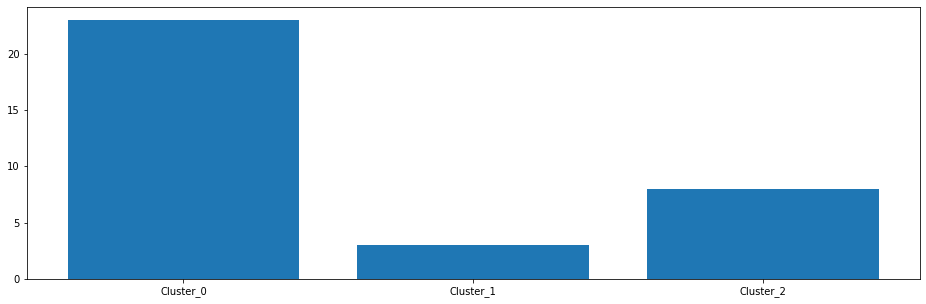

In [ ]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered_ekspor))]
samples_in_cluster = [val.shape[0] for val in ts_clustered_ekspor]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

==========Cluster number: 0==========


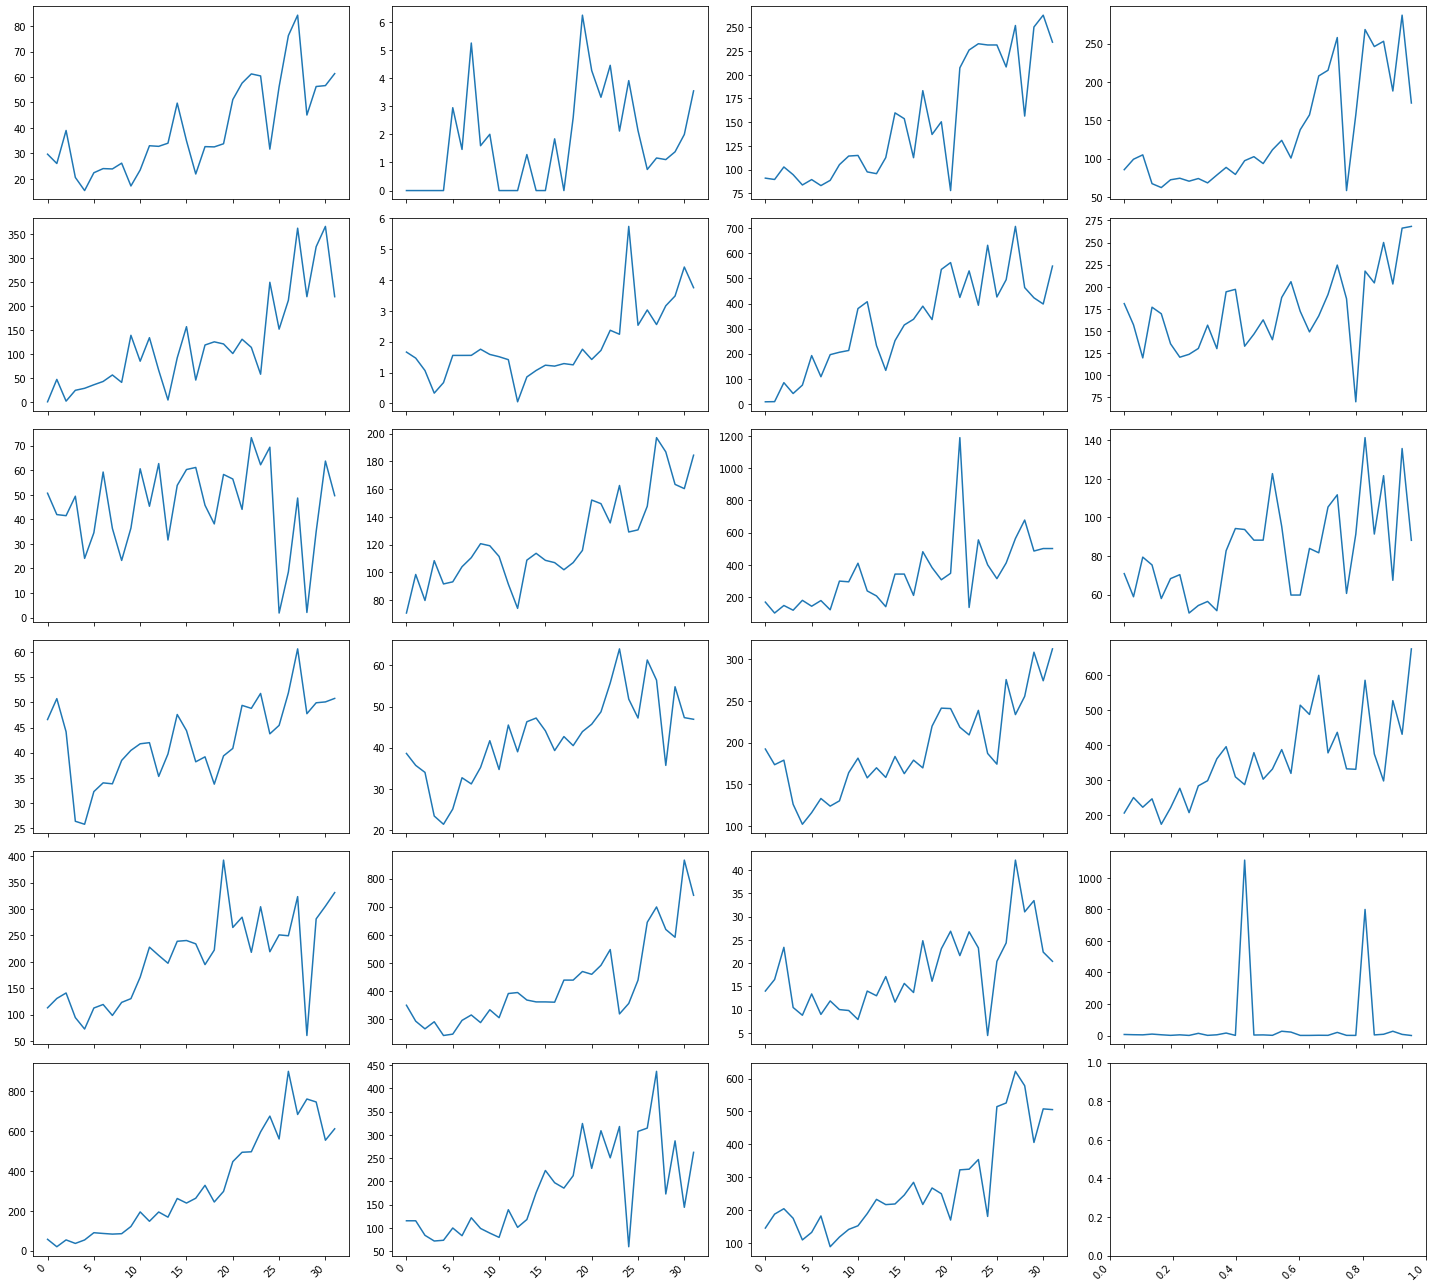

==========Cluster number: 1==========


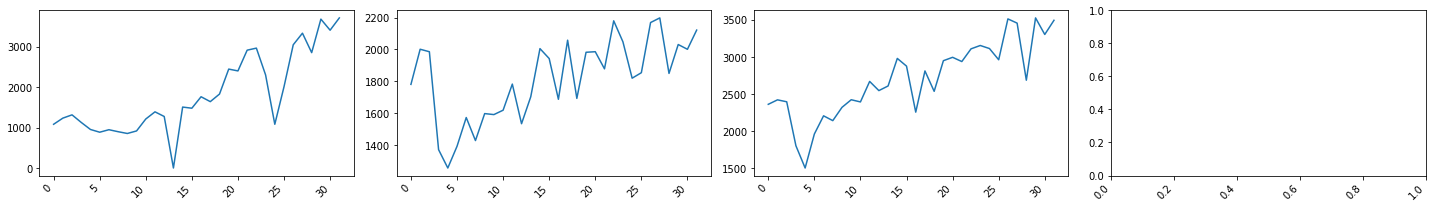

==========Cluster number: 2==========


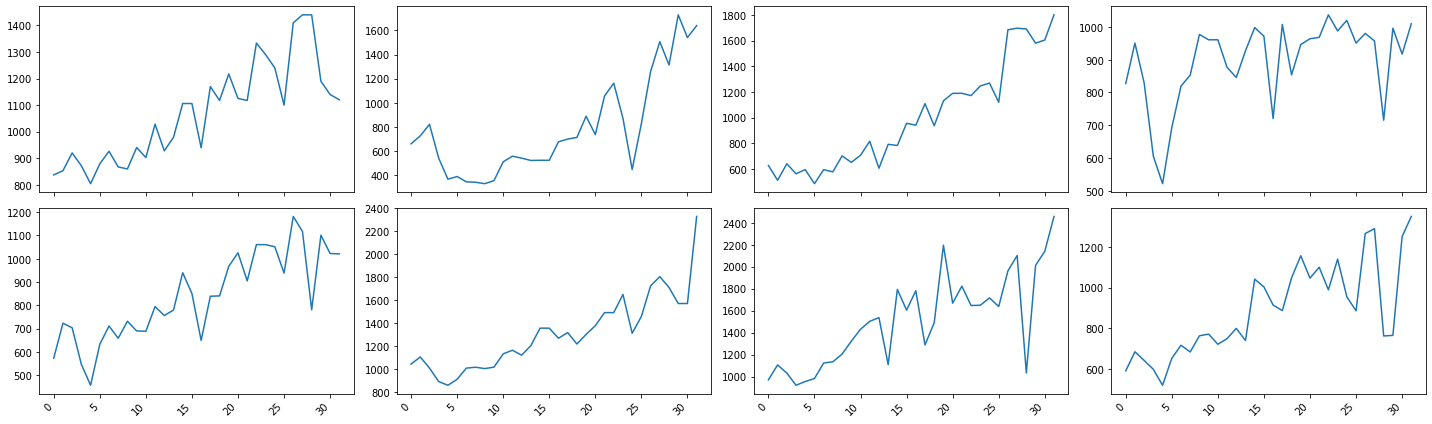

In [ ]:
for cluster in range(len(ts_clustered_ekspor)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered_ekspor[cluster])

Text(0, 0.5, 'Ekspor')

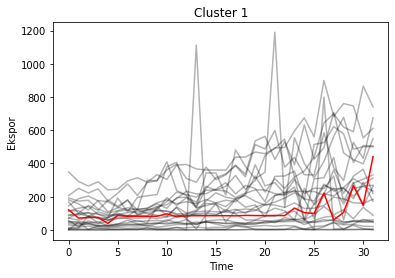

In [ ]:
plt.plot(ts_clustered_ekspor[0].T,"k-",alpha=0.3)
plt.plot(kmeans_model3.cluster_centers_[0], "r-")
plt.title("Cluster 1")
plt.xlabel('Time')
plt.ylabel('Ekspor')

Text(0, 0.5, 'Ekspor')

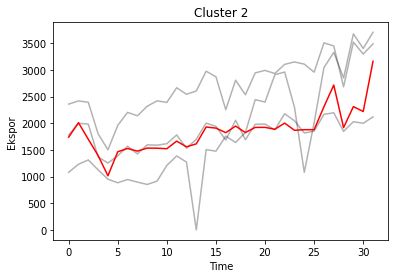

In [ ]:
plt.plot(ts_clustered_ekspor[1].T,"k-",alpha=0.3)
plt.plot(kmeans_model3.cluster_centers_[1], "r-")
plt.title("Cluster 2")
plt.xlabel('Time')
plt.ylabel('Ekspor')

Text(0, 0.5, 'Ekspor')

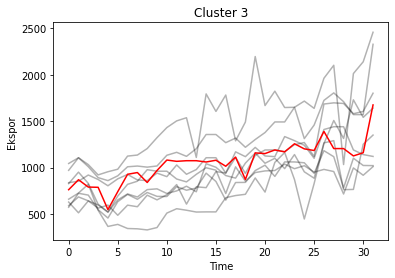

In [ ]:
plt.plot(ts_clustered_ekspor[2].T,"k-",alpha=0.3)
plt.plot(kmeans_model3.cluster_centers_[2], "r-")
plt.title("Cluster 3")
plt.xlabel('Time')
plt.ylabel('Ekspor')

### Kernel KMEANS

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeser

[66.0, 64.0, 61.99999999999999, 60.0, 58.0, 56.0, 54.00000000000001, 52.0, 50.0, 48.0]
[-0.03924202068441712, -0.11388266632171505, -0.22124988632595186, -0.2771727275090324, -0.25412829044268825, -0.41859375562015616, -0.3829592053923023, -0.412775337122342, -0.3975174841930926]


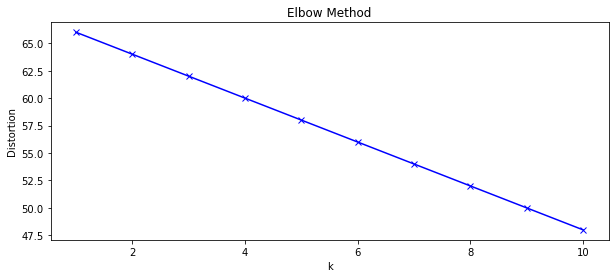

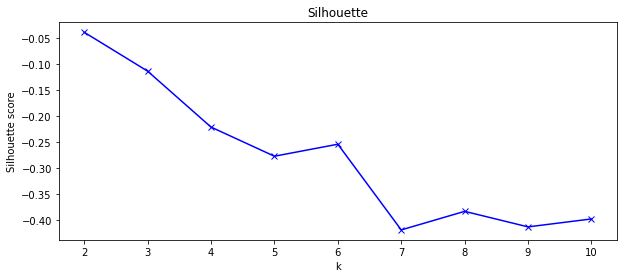

In [ ]:
get_kernelKmeans_results(data_array3, max_clusters=10, seed=23)

##Impor

In [ ]:
Impor = pd.DataFrame()

In [ ]:
Impor[["Periode","Impor Aceh"]]=dataaceh[["Periode","Impor"]]
Impor["Impor Banten"]=dataBanten["Impor"]
Impor["Impor Gorontalo"]=dataGorontalo["Impor"]
Impor["Impor KalimantanBarat"]=dataKalimantanBarat["Impor"]
Impor["Impor KalimantanSelatan"]=dataKalimantanSelatan["Impor"]
Impor["Impor KalimantanTimur"]=dataKalimantanTimur[["Impor"]]
Impor["Impor KalimantanUtara"]=dataKalimantanUtara[["Impor"]]
Impor["Impor NTB"]=dataNTB[["Impor"]]
Impor["Impor NTT"]=dataNTT[["Impor"]]
Impor["Impor Papua"]=dataPapua[["Impor"]]
Impor["Impor PapuaBarat"]=dataPapuaBarat[["Impor"]]
Impor["Impor SulawesiBarat"]=dataSulawesiBarat[["Impor"]]
Impor["Impor SulawesiSelatan"]=dataSulawesiSelatan[["Impor"]]
Impor["Impor SulawesiTengah"]=dataSulawesiTengah[["Impor"]]
Impor["Impor SulawesiTenggara"]=dataSulawesiTenggara[["Impor"]]
Impor["Impor SulawesiUtara"]=dataSulawesiUtara[["Impor"]]
Impor["Impor Bali"]=databali[["Impor"]]
Impor["Impor Diy"]=datadiy[["Impor"]]
Impor["Impor Jakarta"]=datajakarta[["Impor"]]
Impor["Impor Jambi"]=datajambi[["Impor"]]
Impor["Impor Jateng"]=datajateng[["Impor"]]
Impor["Impor Jatim"]=datajatim[["Impor"]]
Impor["Impor jawabarat"]=datajawabarat[["Impor"]]
Impor["Impor kepri"]=datakepri[["Impor"]]
Impor["Impor lampung"]=datalampung[["Impor"]]
Impor["Impor riau"]=datariau[["Impor"]]
Impor["Impor sumbar"]=datasumbar[["Impor"]]
Impor["Impor sumsel"]=datasumsel[["Impor"]]
Impor["Impor sumut"]=datasumut[["Impor"]]
Impor["Impor Bengkulu"]=dataBengkulu[["Impor"]]
Impor["Impor Maluku"]=dataMaluku[["Impor"]]
Impor["Impor MalukuUtara"]=dataMalukuUtara[["Impor"]]
Impor["Impor Kep Bangka Belitung"]=datakepbb[["Impor"]]
Impor[["Impor Kalteng"]]=dataKalteng[["Impor"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb242c0790>,
      dtype=object)

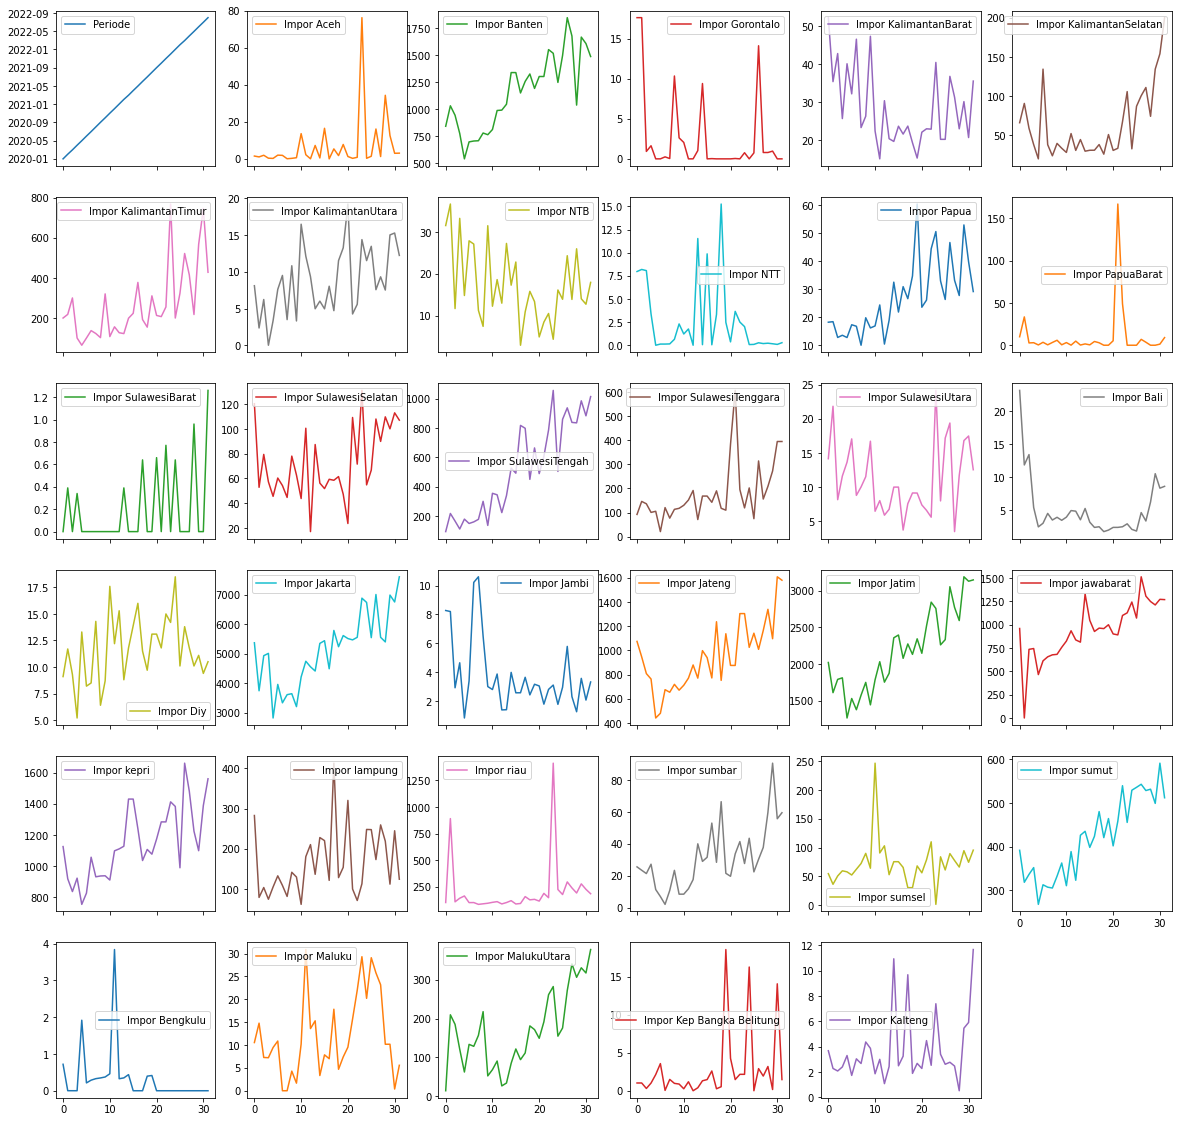

In [ ]:
Impor.plot(subplots=True,layout=(6,6),figsize=(20, 20))

In [ ]:
Impor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Periode                    32 non-null     datetime64[ns]
 1   Impor Aceh                 32 non-null     float64       
 2   Impor Banten               32 non-null     float64       
 3   Impor Gorontalo            32 non-null     float64       
 4   Impor KalimantanBarat      32 non-null     float64       
 5   Impor KalimantanSelatan    32 non-null     float64       
 6   Impor KalimantanTimur      32 non-null     float64       
 7   Impor KalimantanUtara      32 non-null     float64       
 8   Impor NTB                  32 non-null     float64       
 9   Impor NTT                  32 non-null     float64       
 10  Impor Papua                32 non-null     float64       
 11  Impor PapuaBarat           32 non-null     float64       
 12  Impor Sula

In [ ]:
data_array4 = np.array(Impor.T.drop('Periode').values)

In [ ]:
Impor.describe().T

count         mean          std         min  \
Impor Aceh                  32.0     6.733885    14.584740     0.00000   
Impor Banten                32.0  1157.541875   344.867344   541.90000   
Impor Gorontalo             32.0     2.560399     5.170244     0.00000   
Impor KalimantanBarat       32.0    28.405938     9.836631    15.07000   
Impor KalimantanSelatan     32.0    63.757812    44.459869    20.03000   
Impor KalimantanTimur       32.0   266.680625   178.344087    65.84000   
Impor KalimantanUtara       32.0     8.802812     4.646966     0.00000   
Impor NTB                   32.0    17.328116     8.977308     2.87700   
Impor NTT                   32.0     2.699720     3.972588     0.00000   
Impor Papua                 32.0    27.131250    13.033859    10.04000   
Impor PapuaBarat            32.0    10.101875    30.369191     0.00000   
Impor SulawesiBarat         32.0     0.189063     0.342329     0.00000   
Impor SulawesiSelatan       32.0    72.648438    28.868160    17.11000   
Impor SulawesiTengah        32.0   515.665313   315.906427    93.19000   
Impor SulawesiTenggara      32.0   181.095438   121.237864    20.95000   
Impor SulawesiUtara         32.0    11.283750     5.233436     3.51000   
Impor Bali                  32.0     5.177991     4.421395     1.77180   
Impor Diy                   32.0    11.687500     3.066021     5.20000   
Impor Jakarta               32.0  5136.408812  1211.174615  2818.02000   
Impor Jambi                 32.0     3.757188     2.476001     0.82800   
Impor Jateng                32.0   954.006250   284.588231   441.94000   
Impor Jatim                 32.0  2184.712888   546.829205  1263.77753   
Impor jawabarat             32.0   940.654688   299.356736     0.63000   
Impor kepri                 32.0  1149.010813   230.084699   755.87000   
Impor lampung               32.0   166.441500    82.593011    61.80000   
Impor riau                  32.0   208.660023   262.391607    84.52368   
Impor sumbar                32.0    30.960313    19.900577     2.07000   
Impor sumsel                32.0    72.853883    39.098521     1.45000   
Impor sumut                 32.0   421.096094    89.866849   267.16000   
Impor Bengkulu              32.0     0.325725     0.741145     0.00000   
Impor Maluku                32.0    12.038943     8.786075     0.00000   
Impor MalukuUtara           32.0   169.525625    99.541905    13.56000   
Impor Kep Bangka Belitung   32.0     2.783750     4.584148     0.00000   
Impor Kalteng               32.0     3.766563     2.673880     0.53000   

                                   25%          50%          75%          max  
Impor Aceh                    0.452001     1.634581     5.841284    76.190888  
Impor Banten                836.217500  1173.405000  1378.452500  1850.080000  
Impor Gorontalo               0.000000     0.146616     1.184455    17.654000  
Impor KalimantanBarat        21.352500    23.665000    35.407500    52.190000  
Impor KalimantanSelatan      31.045000    42.205000    88.045000   200.290000  
Impor KalimantanTimur       135.977500   211.180000   322.065000   768.480000  
Impor KalimantanUtara         4.967500     8.075000    12.157500    19.240000  
Impor NTB                    11.559250    14.412500    24.762500    36.742000  
Impor NTT                     0.125754     0.502795     3.333099    15.265317  
Impor Papua                  17.245000    25.285000    33.065000    60.450000  
Impor PapuaBarat              0.192500     2.820000     4.970000   167.090000  
Impor SulawesiBarat           0.000000     0.000000     0.352500     1.260000  
Impor SulawesiSelatan        53.942500    62.160000   100.217500   131.110000  
Impor SulawesiTengah        207.350000   490.760000   822.795000  1057.410000  
Impor SulawesiTenggara      112.498500   144.410000   197.100000   606.850000  
Impor SulawesiUtara           7.545000    10.020000    14.810000    24.160000  
Impor Bali                    2.503850     3.548500     5.319575    23.20000

### KMEANS Time Series

  0%|          | 0/10 [00:00<?, ?it/s]

[23321707.349965848, 4896662.360119188, 885439.3724194317, 373273.309077239, 167907.85025444438, 121544.29008220036, 92130.58386346966, 68863.07876049799, 46853.348505671165, 33420.240917435876]
[0.8727596511459923, 0.7820443085459569, 0.7526978319268995, 0.6382959936986063, 0.6232302766997992, 0.5350510471135352, 0.5931859474742305, 0.5609569128631169, 0.549290108802397]


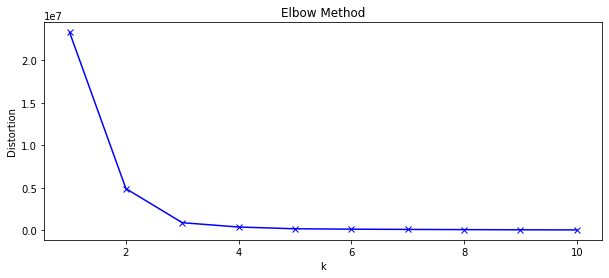

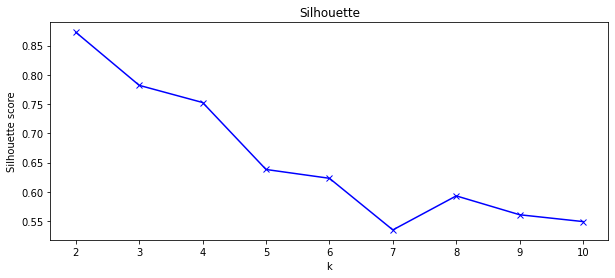

In [ ]:
get_kmeans_results(data=data_array4, max_clusters=10, metric='dtw', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[30648445.722599253, 7799284.991728639, 1790767.1445701919, 724007.8851308073, 362439.8129866023, 250468.20510427578, 191163.3574962169, 146046.59233738857, 118150.33494768268, 72574.75448871042]
[0.8727596511459923, 0.7820443085459569, 0.7526978319268995, 0.6611210910627159, 0.606787919004938, 0.5745588843938244, 0.5510130696990674, 0.5393462656383476, 0.549290108802397]


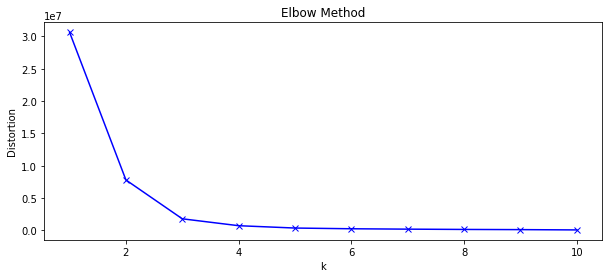

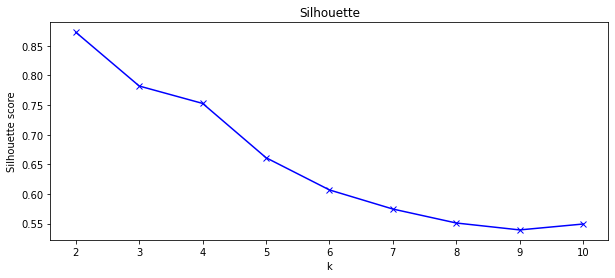

In [ ]:
get_kmeans_results(data=data_array4, max_clusters=10, metric='euclidean', seed=123)

  0%|          | 0/10 [00:00<?, ?it/s]

[1.0736387268002452e+16, 306404058241725.8, 3330227146327.893, 700686086054.8483, 129593309763.2988, 63272908984.62596, 46968948246.492615, 28790536807.538464, 12486576069.405107, 5845504755.198384]
[0.8727596511459923, 0.7616270755440401, 0.7526978319268995, 0.6382959936986063, 0.6232302766997992, 0.5480047652463851, 0.5986620187202183, 0.5403930241140793, 0.554766180048385]


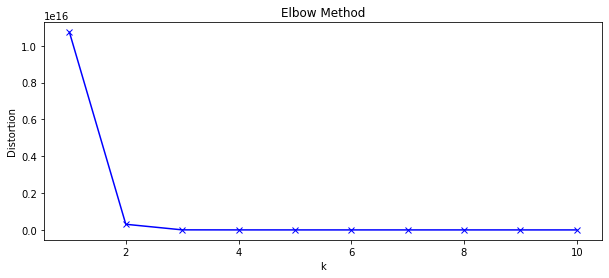

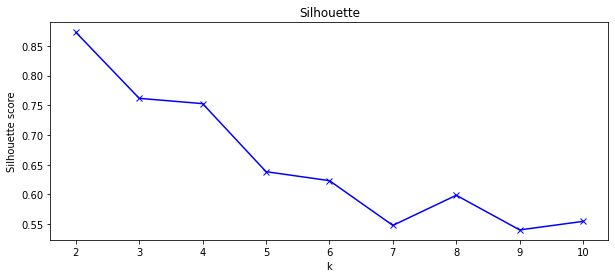

In [ ]:
get_kmeans_results(data=data_array4, max_clusters=10, metric='softdtw', seed=123)

In [ ]:
kmeans_model4 = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10000, random_state=1234)
cluster_labels4 = kmeans_model4.fit_predict(data_array4)

In [ ]:
hasilImpor=pd.DataFrame()
hasilImpor["Provinsi"]=Impor.columns.drop('Periode')
hasilImpor["Cluster"]=cluster_labels4

In [ ]:
hasilImpor

Provinsi  Cluster
0                  Impor Aceh        0
1                Impor Banten        2
2             Impor Gorontalo        0
3       Impor KalimantanBarat        0
4     Impor KalimantanSelatan        0
5       Impor KalimantanTimur        0
6       Impor KalimantanUtara        0
7                   Impor NTB        0
8                   Impor NTT        0
9                 Impor Papua        0
10           Impor PapuaBarat        0
11        Impor SulawesiBarat        0
12      Impor SulawesiSelatan        0
13       Impor SulawesiTengah        0
14     Impor SulawesiTenggara        0
15        Impor SulawesiUtara        0
16                 Impor Bali        0
17                  Impor Diy        0
18              Impor Jakarta        1
19                Impor Jambi        0
20               Impor Jateng        2
21                Impor Jatim        2
22            Impor jawabarat        2
23                Impor kepri        2
24              Impor lampung        0
25                 Impor riau        0
26               Impor sumbar        0
27               Impor sumsel        0
28                Impor sumut        0
29             Impor Bengkulu        0
30               Impor Maluku        0
31          Impor MalukuUtara        0
32  Impor Kep Bangka Belitung        0
33              Impor Kalteng        0

In [ ]:
hasilImpor['Cluster'].value_counts()

0    28
2     5
1     1
Name: Cluster, dtype: int64

In [ ]:
ts_clustered_impor = [ data_array4[(cluster_labels4 == lable), :] for lable in np.unique(cluster_labels4)]

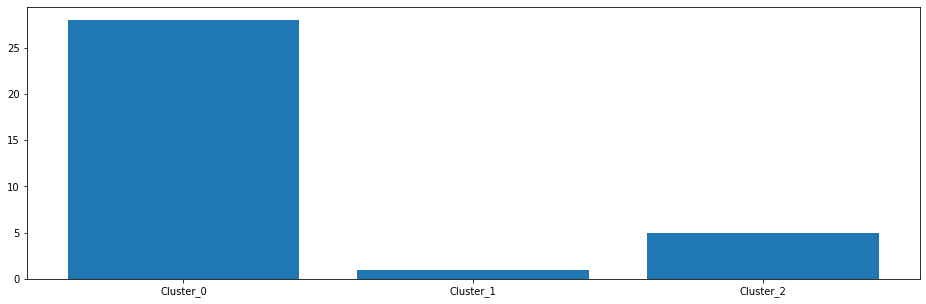

In [ ]:
# Objects distribution in the obtained clusters 
labels = [f'Cluster_{i}' for i in range(len(ts_clustered_impor))]
samples_in_cluster = [val.shape[0] for val in ts_clustered_impor]

plt.figure(figsize=(16,5))
plt.bar(labels, samples_in_cluster);

==========Cluster number: 0==========


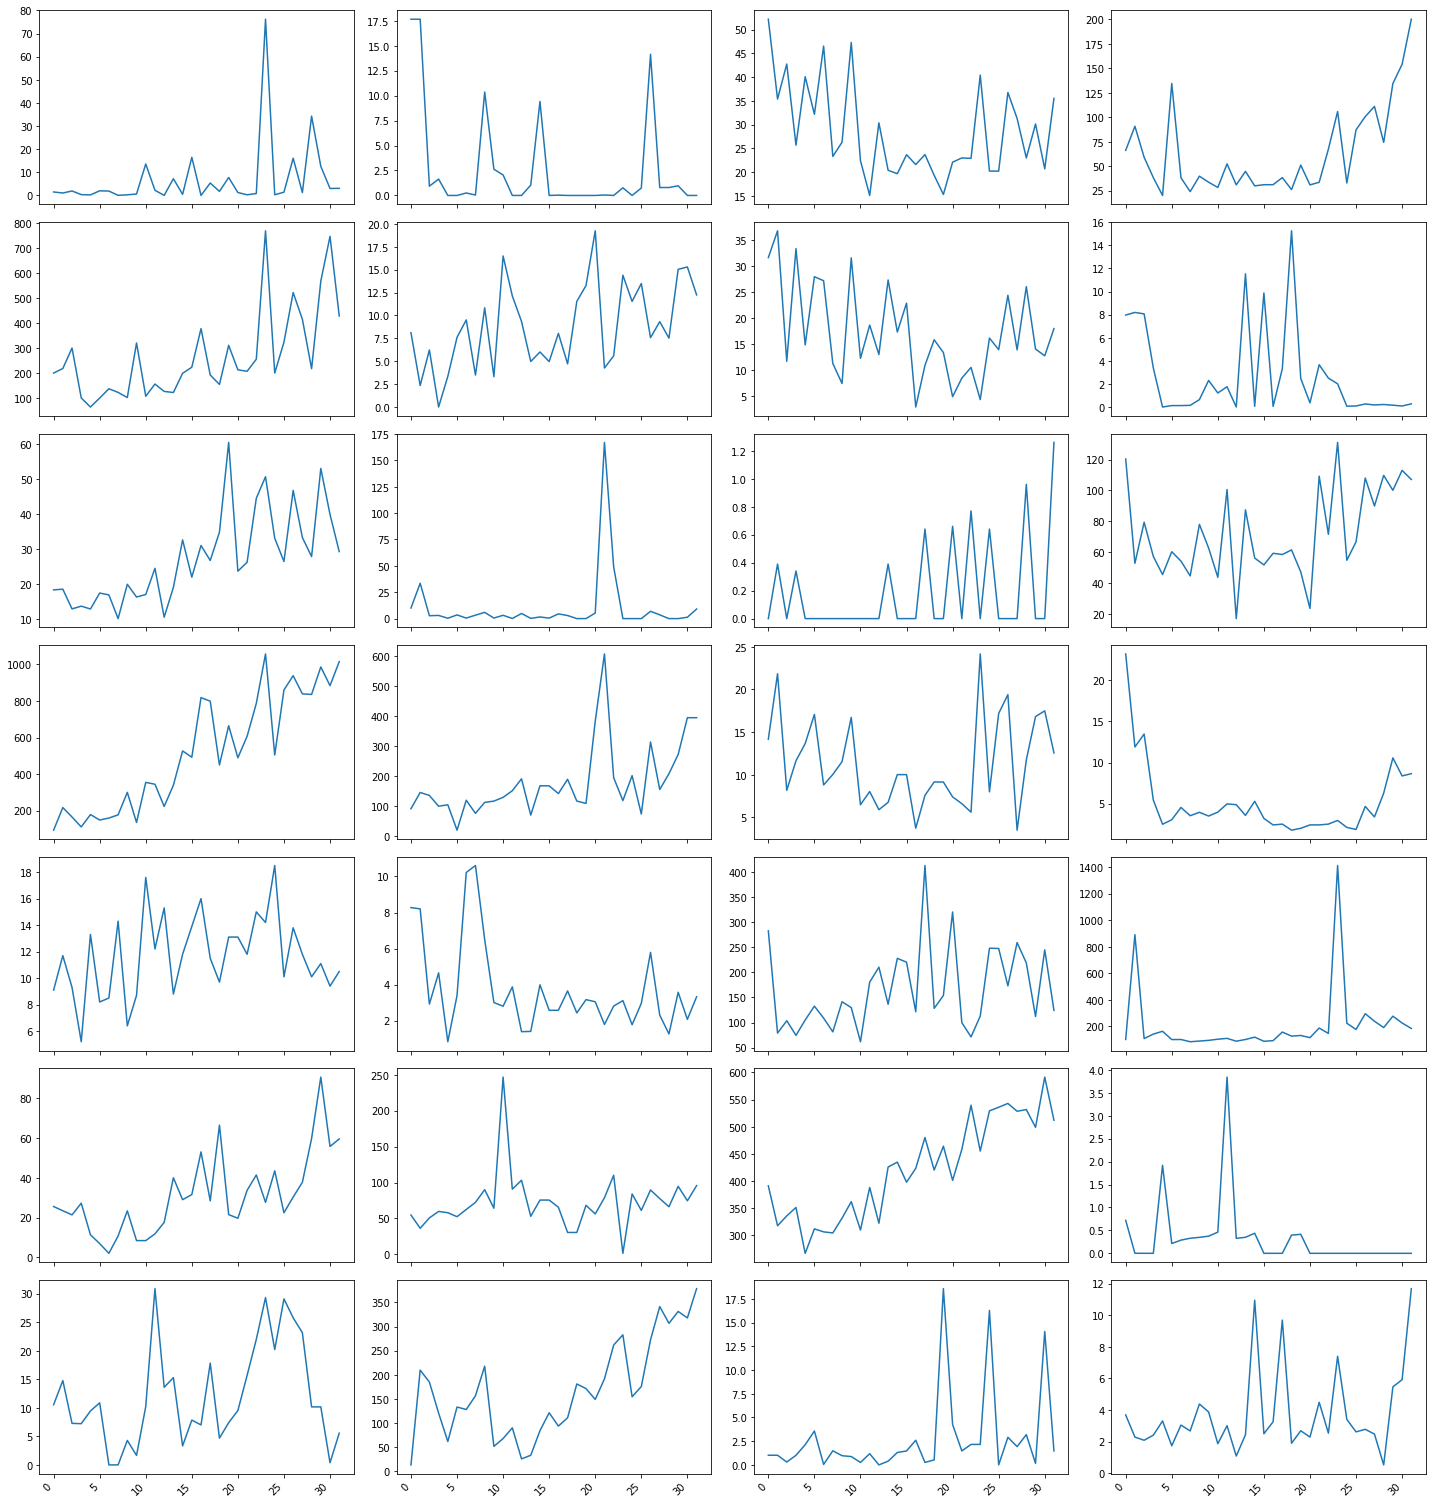

==========Cluster number: 1==========


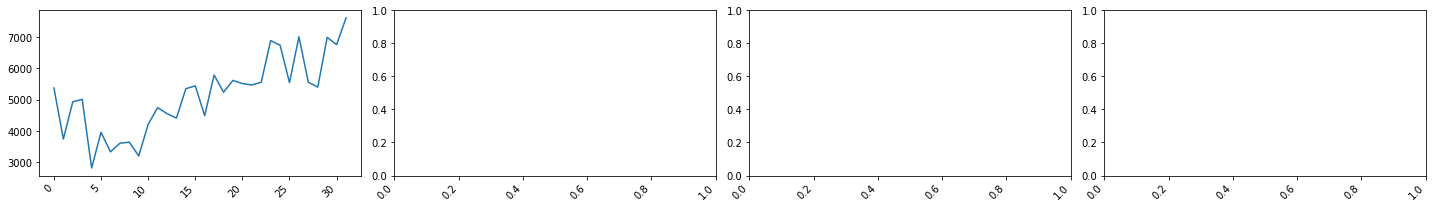

==========Cluster number: 2==========


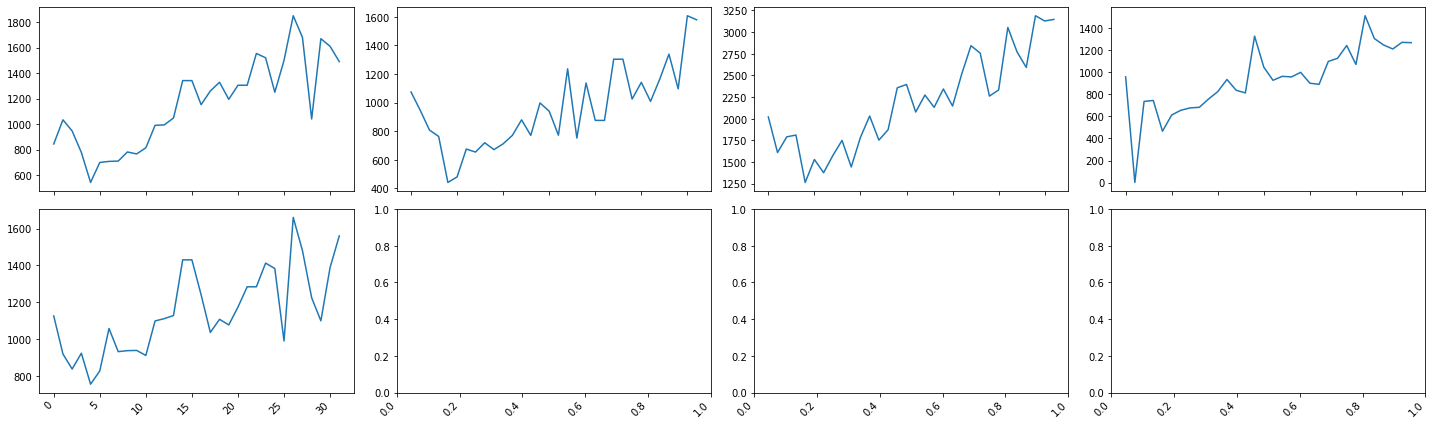

In [ ]:
for cluster in range(len(ts_clustered_impor)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered_impor[cluster])

Text(0, 0.5, 'Impor')

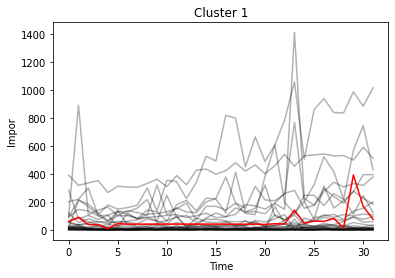

In [ ]:
plt.plot(ts_clustered_impor[0].T,"k-",alpha=0.3)
plt.plot(kmeans_model4.cluster_centers_[0], "r-")
plt.title("Cluster 1")
plt.xlabel('Time')
plt.ylabel('Impor')

Text(0, 0.5, 'Impor')

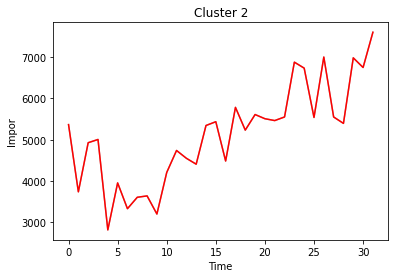

In [ ]:
plt.plot(ts_clustered_impor[1].T,"k-",alpha=0.3)
plt.plot(kmeans_model4.cluster_centers_[1], "r-")
plt.title("Cluster 2")
plt.xlabel('Time')
plt.ylabel('Impor')

Text(0, 0.5, 'Impor')

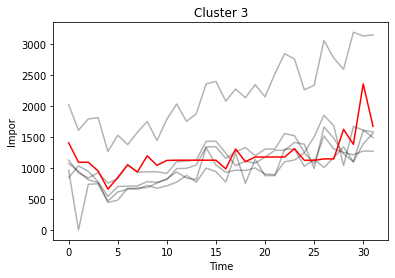

In [ ]:
plt.plot(ts_clustered_impor[2].T,"k-",alpha=0.3)
plt.plot(kmeans_model4.cluster_centers_[2], "r-")
plt.title("Cluster 3")
plt.xlabel('Time')
plt.ylabel('Impor')

### Kernel KMEANS

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 34 1-dimensional timeseries
  '{} 1-dimensional timeser

[65.9999957662345, 63.999989717998105, 61.99999999999999, 59.999979435996224, 58.0, 56.0, 53.999979435996224, 51.99995201732451, 50.0, 48.0]
[-0.08247002134874766, -0.23520019956395402, -0.2686549830428423, -0.2725979210757915, -0.21250658384149237, -0.5388189347733467, -0.5270384495375612, -0.45309429197147877, -0.5285915337328718]


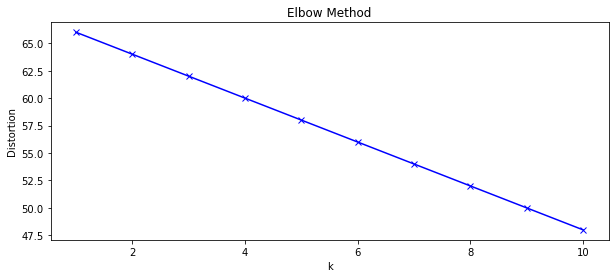

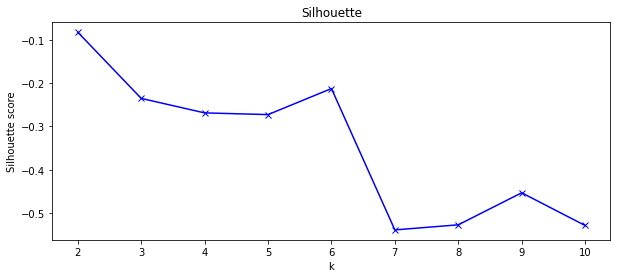

In [ ]:
get_kernelKmeans_results(data_array4, max_clusters=10, seed=23)

# EDA

Text(0, 0.5, 'IHK')

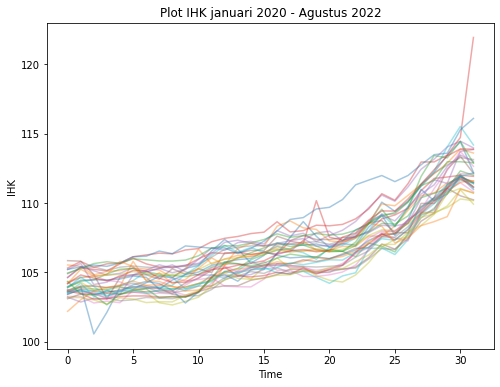

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(data_array.T,alpha=0.4)
plt.title("Plot IHK januari 2020 - Agustus 2022")
plt.xlabel('Time')
plt.ylabel('IHK')

Text(0, 0.5, 'Inflasi')

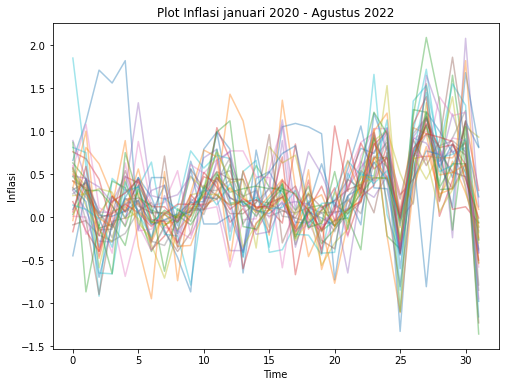

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(data_array2.T,alpha=0.4)
plt.title("Plot Inflasi januari 2020 - Agustus 2022")
plt.xlabel('Time')
plt.ylabel('Inflasi')

Text(0, 0.5, 'Ekspor')

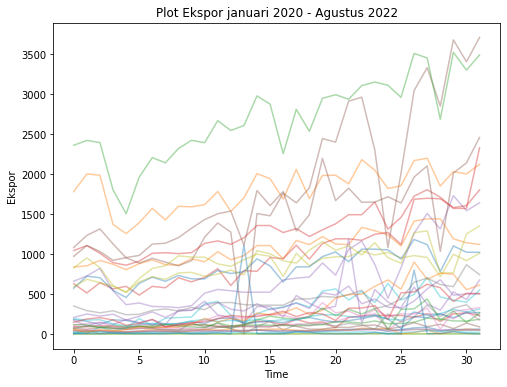

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(data_array3.T,alpha=0.4)
plt.title("Plot Ekspor januari 2020 - Agustus 2022")
plt.xlabel('Time')
plt.ylabel('Ekspor')

Text(0, 0.5, 'Impor')

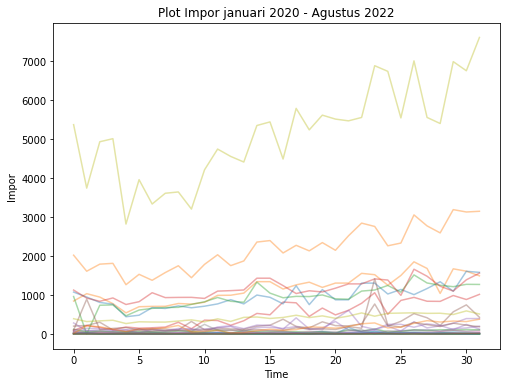

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(data_array4.T,alpha=0.4)
plt.title("Plot Impor januari 2020 - Agustus 2022")
plt.xlabel('Time')
plt.ylabel('Impor')